<a href="https://colab.research.google.com/github/srilamaiti/ml_works/blob/main/sales_forecast_str_csc_day_level.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Installing New Libraries**

In [1]:
!pip install python-weather
!pip install meteostat
!pip install geopandas
!pip install geopy
!pip install pgeocode
!pip install pyowm
!pip install wwo-hist
!pip install openweathermap_requests
!pip install holidays
!pip install shap
!pip install optuna
!pip install hyperopt 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for python-weather: filename=python_weather-0.4.3-py3-none-any.whl size=10343 sha256=2841d03ba736693d25eefb70d4ec1701d88b2da2781660f8cfec5862c222c748
  Stored in directory: /root/.cache/pip/wheels/b7/7a/c7/f84adc5c4e3f87615013b2987856750dc521729dc43d656e3d
Successfully built python-weather
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.0 MB/s 
     |████████████████████████████████| 6.3 MB 43.1 MB/s 
     |████████████████████████████████| 16.7 MB 41.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: http

# **Importing Libraries**

In [2]:
import matplotlib.pyplot as plt
from datetime import datetime
from meteostat import Point, Daily
from geopy.geocoders import Nominatim
import xgboost
print(xgboost.__version__)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import pgeocode
import numpy as np
import pyowm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

from wwo_hist import retrieve_hist_data
from openweathermap_requests import OpenWeatherMapRequests
from statsmodels.formula.api import ols
import statsmodels.api as sm
import holidays
import datetime
from datetime import date
from datetime import timedelta
import xgboost as xgb
from xgboost import plot_importance, plot_tree

0.90


# **Holiday**

In [3]:
class holiday:
    """
    This class lists both Federal and State holidays for current year 
    and next 9 years.
    """
    def __init__(self):
        """
        This initialization method obtains current year and lists all USA states.
        """
        self.current_year = date.today().year
        self.states_list = [ 'AK', 'AL', 'AR', 'AZ', 'CA', 
                             'CO', 'CT', 'DC', 'DE', 'FL', 
                             'GA', 'HI', 'IA', 'ID', 'IL', 
                             'IN', 'KS', 'KY', 'LA', 'MA', 
                             'MD', 'ME', 'MI', 'MN', 'MO', 
                             'MS', 'MT', 'NC', 'ND', 'NE', 
                             'NH', 'NJ', 'NM', 'NV', 'NY', 
                             'OH', 'OK', 'OR', 'PA', 'RI', 
                             'SC', 'SD', 'TN', 'TX', 'UT', 
                             'VA', 'VT', 'WA', 'WI', 'WV', 'WY'
                            ]
        self.holiday_date_list = []
        self.holiday_details_list = []
        self.df_holiday = pd.DataFrame()
    
    def collect_federal_holiday_list(self):
        """
        This method lists all federal holidays along with observed ones
        in USA in a given year.
        """
        for year in range(self.current_year-3, self.current_year + 11):
            # Print all the holidays in United States in the year 
            for federal_holiday_val in holidays.UnitedStates(years = year, observed = True).items():
                print(f"Federal Holiday :: {str(federal_holiday_val[0])} :: {federal_holiday_val[1]}")
                self.holiday_date_list.append(federal_holiday_val[0])
                self.holiday_details_list.append(('FE', 
                                                  year, 
                                                  str(federal_holiday_val[0]), 
                                                  federal_holiday_val[1]
                                                 )
                                                )

    def collect_state_holiday_list(self):
        """
        This method lists all state holidays along with observed ones
        in USA in a given year which are not federal holidays.
        """
        for year in range(self.current_year-3, self.current_year + 11):
            for state in self.states_list:
                for state_holiday_val in holidays.UnitedStates(years = year, observed = True, subdiv = state).items():
                    if state_holiday_val[0] not in self.holiday_date_list:
                        print(f"State {state} Holiday :: {str(state_holiday_val[0])} :: {state_holiday_val[1]}")
                        self.holiday_date_list.append(state_holiday_val[0])
                        self.holiday_details_list.append((state, 
                                                          year, 
                                                          str(state_holiday_val[0]), 
                                                          state_holiday_val[1]
                                                          )
                                                        )
    
    def get_holiday(self, year):
        """
        This method provides the list of federal and state holidays 
        in a given year. It also writes the data in a csv file with name format 
        as holiday_list_<<4 digit year, comes from input parameter>>.csv.
        """
        yearly_holiday_list = []
        print(f"List of holidays in {year}:-")
        #print(self.holiday_details_list)
        for holiday_val in self.holiday_details_list:
            if holiday_val[1] == year:
                print(f"{holiday_val[0]} :: {holiday_val[1]} :: {holiday_val[2]} :: {holiday_val[3]}")
                yearly_holiday_list.append(holiday_val)
        self.df_holiday = pd.DataFrame(yearly_holiday_list, columns =['level', 'year', 'date', 'holiday_name'])
        #print(self.df_holiday)
        self.df_holiday.to_csv('holiday_list_' + str(year) + '.csv', index = False)
        return self.df_holiday
    
    def __repr__(self):
        """
        This method prints states list and current year.
        """
        print(f"Current Year : {self.current_year}")
        print(f"State List : {self.states_list}")

    def __str__(self):
        """
        This method prints states list and current year.
        """
        print(f"Current Year : {self.current_year}")
        print(f"State List : {self.states_list}") 

current_year = date.today().year
hdy = holiday()
help(holiday)
hdy.collect_federal_holiday_list()
hdy.collect_state_holiday_list()

current_year_hdy = hdy.get_holiday(current_year)
one_year_ago_year_hdy = hdy.get_holiday(current_year-1)
two_year_ago_year_hdy = hdy.get_holiday(current_year-2)
three_year_ago_year_hdy = hdy.get_holiday(current_year-3)
df_holiday_combined = pd.concat([current_year_hdy, one_year_ago_year_hdy, two_year_ago_year_hdy])

Help on class holiday in module __main__:

class holiday(builtins.object)
 |  This class lists both Federal and State holidays for current year 
 |  and next 9 years.
 |  
 |  Methods defined here:
 |  
 |  __init__(self)
 |      This initialization method obtains current year and lists all USA states.
 |  
 |  __repr__(self)
 |      This method prints states list and current year.
 |  
 |  __str__(self)
 |      This method prints states list and current year.
 |  
 |  collect_federal_holiday_list(self)
 |      This method lists all federal holidays along with observed ones
 |      in USA in a given year.
 |  
 |  collect_state_holiday_list(self)
 |      This method lists all state holidays along with observed ones
 |      in USA in a given year which are not federal holidays.
 |  
 |  get_holiday(self, year)
 |      This method provides the list of federal and state holidays 
 |      in a given year. It also writes the data in a csv file with name format 
 |      as holiday_list_<<4 d

In [4]:
df_holiday_combined

level  year        date                          holiday_name
0     FE  2022  2022-01-01                        New Year's Day
1     FE  2022  2022-01-17            Martin Luther King Jr. Day
2     FE  2022  2022-02-21                 Washington's Birthday
3     FE  2022  2022-05-30                          Memorial Day
4     FE  2022  2022-06-19  Juneteenth National Independence Day
..   ...   ...         ...                                   ...
44    VA  2020  2020-01-17                       Lee Jackson Day
45    VT  2020  2020-03-03                      Town Meeting Day
46    VT  2020  2020-08-16                 Bennington Battle Day
47    VT  2020  2020-08-17      Bennington Battle Day (Observed)
48    WV  2020  2020-06-20                     West Virginia Day

[152 rows x 4 columns]

# **Setting up the Period**

In [5]:
# Set time period
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2022, 10, 31)

# **Getting Weather Data at Day and Zipcode Level**

In [10]:
df_weather = pd.read_csv('result_3zip_weather.csv')
df_weather.columns = [col.lower() for col in df_weather.columns]
df_weather['zip5'] = df_weather['zip5'].astype(str)
df_weather['zip5'] = df_weather['zip5'].apply(lambda x : x.zfill(5))
df_weather.head()

zip5      day_dt  high_temperature_amt  low_temperature_amt  sky_cd  \
0  01749  2019-03-20                  50.8                 24.3       1   
1  02747  2019-03-20                  52.2                 21.7       1   
2  05673  2019-03-20                  44.9                 16.9       3   
3  01749  2019-03-21                  51.5                 32.2      26   
4  02747  2019-03-21                  53.1                 31.7      12   

   precipitation_cd  temperature_cd  air_cd uv_index_dsc  wind_speed_amt  \
0                 0               6      30          LOW            14.9   
1                 0               6      22          LOW            17.9   
2                 0               6       0          LOW            11.9   
3                66               6      30      MINIMAL            14.9   
4                66               6      30      MINIMAL            32.8   

   humidity_pct  dew_point_amt  rain_fall_amt  snow_fall_amt  \
0            30           18.8            0.0            0.0   
1            29           19.2            0.0            0.0   
2            47           23.1            0.0            0.0   
3            41           26.5            0.5            0.0   
4            38           26.1            0.5            0.0   

   comfort_index_amt  precipitation_probability_pct feed_cd  \
0               44.8                              3     OTH   
1               46.1                              0     OTH   
2               37.1                              6     OTH   
3               46.1                             93     OTH   
4               46.1                             99     OTH   

                  last_update_ts  
0  2019-03-20 07:31:11.000 -0600  
1  2019-03-20 07:31:11.000 -0600  
2  2019-03-20 07:31:11.000 -0600  
3  2019-03-21 07:31:31.000 -0600  
4  2019-03-21 07:31:31.000 -0600

# **Loading 5 digit zip codes for Shaws stores.**

In [11]:
df_zip = pd.read_csv('zipcode.txt')
df_zip.columns = [col.lower() for col in df_zip.columns]
df_zip = df_zip.drop_duplicates()
df_zip['zipcode'] = df_zip['zipcode'].apply(lambda x : x.replace("'",""))
df_zip.head()

zipcode
0   05602
1   02067
2   04530
3   02199
4   02126

In [12]:
df_zip[df_zip.zipcode == '03458']

zipcode
148   03458

# **Loading Shaw's Stores Store-Zipcode Combination Data**

In [13]:
df_str_zip = pd.read_csv('store_zipcode.txt')
df_str_zip['zip_code'] = df_str_zip['zip_code'].astype(str)
df_str_zip['zip_code'] =  df_str_zip['zip_code'].apply(lambda x : x.zfill(5))
df_str_zip.columns = ['store_id', 'zip_code']
df_str_zip.head()

store_id zip_code
0       121    05602
1       418    02067
2       553    04530
3       602    02199
4       604    02126

In [14]:
df_str_zip[df_str_zip.zip_code == '03458']

store_id zip_code
148      4694    03458

# **Combining weather and zip code data together.**

In [15]:
df_weather = pd.merge(df_weather, df_str_zip, how = 'inner', left_on = 'zip5', right_on = 'zip_code')

In [16]:
df_weather.columns

Index(['zip5', 'day_dt', 'high_temperature_amt', 'low_temperature_amt',
       'sky_cd', 'precipitation_cd', 'temperature_cd', 'air_cd',
       'uv_index_dsc', 'wind_speed_amt', 'humidity_pct', 'dew_point_amt',
       'rain_fall_amt', 'snow_fall_amt', 'comfort_index_amt',
       'precipitation_probability_pct', 'feed_cd', 'last_update_ts',
       'store_id', 'zip_code'],
      dtype='object')

In [17]:
df_weather = df_weather [['zip5', 'day_dt', 'high_temperature_amt', 'low_temperature_amt',
       'sky_cd', 'precipitation_cd', 'temperature_cd', 'air_cd',
       'uv_index_dsc', 'wind_speed_amt', 'humidity_pct', 'dew_point_amt',
       'rain_fall_amt', 'snow_fall_amt', 'comfort_index_amt',
       'precipitation_probability_pct', 'feed_cd', 
       'store_id']]
df_weather = df_weather[df_weather['zip5'].isin(['02747','05673','05764'])]

In [18]:
df_weather.iloc[0]

zip5                                  02747
day_dt                           2019-03-20
high_temperature_amt                   52.2
low_temperature_amt                    21.7
sky_cd                                    1
precipitation_cd                          0
temperature_cd                            6
air_cd                                   22
uv_index_dsc                            LOW
wind_speed_amt                         17.9
humidity_pct                             29
dew_point_amt                          19.2
rain_fall_amt                           0.0
snow_fall_amt                           0.0
comfort_index_amt                      46.1
precipitation_probability_pct             0
feed_cd                                 OTH
store_id                                619
Name: 1329, dtype: object

# **Getting historical min, max and avg temp weather data on a particular day and zipcode level.**

05602


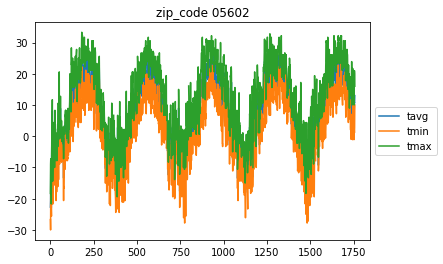

02067


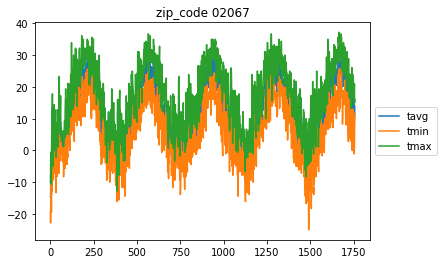

04530


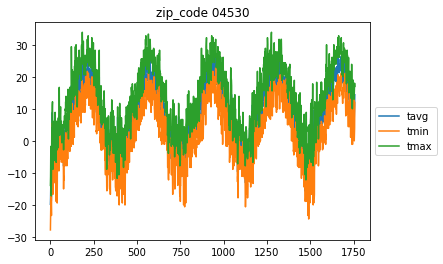

02199


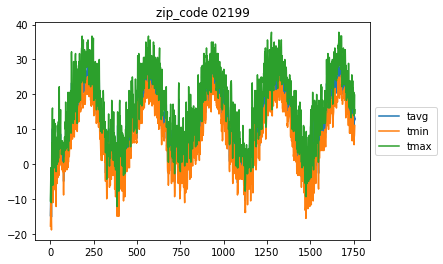

02126


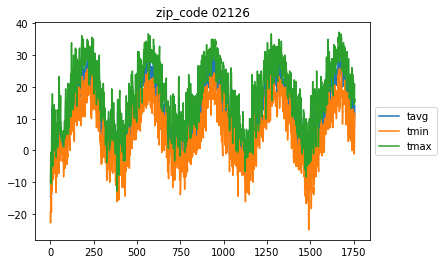

05446


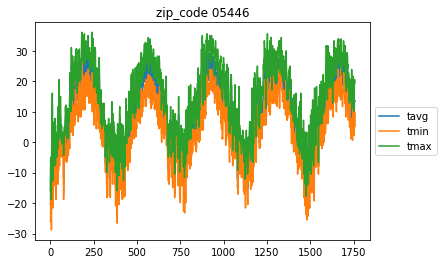

02747


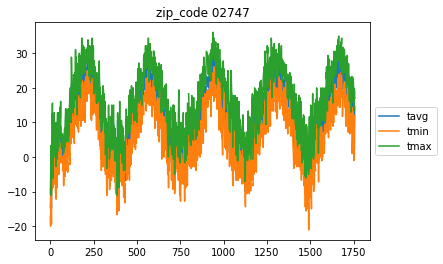

01757


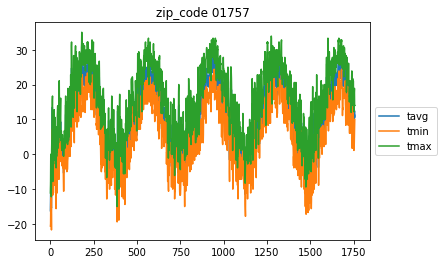

03087


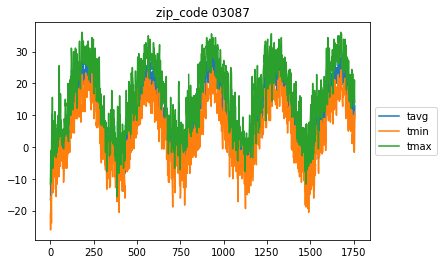

02341


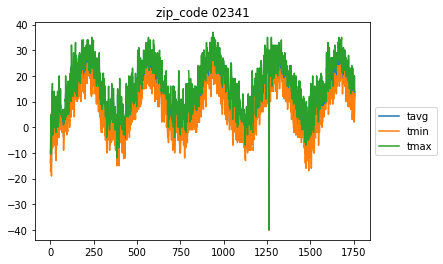

02720


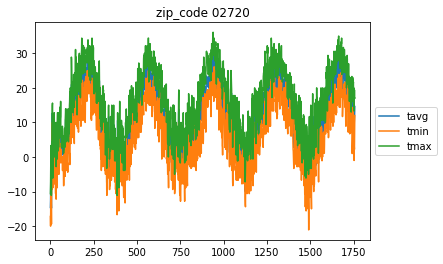

02052


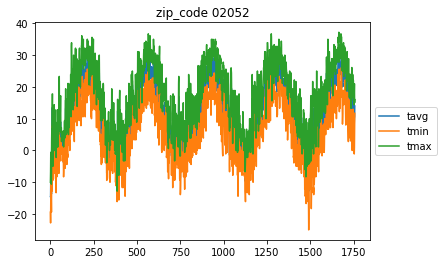

01721


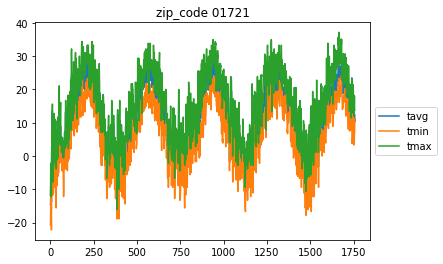

02453


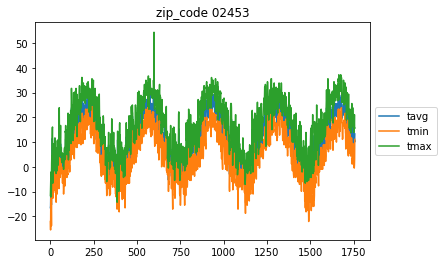

02025


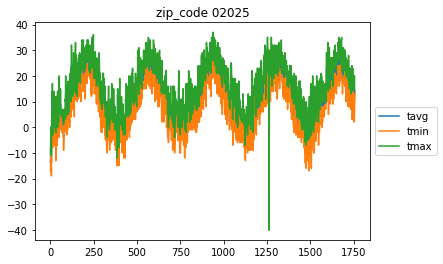

05495


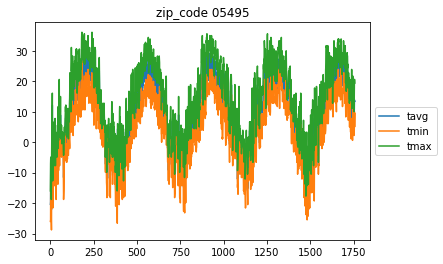

03785


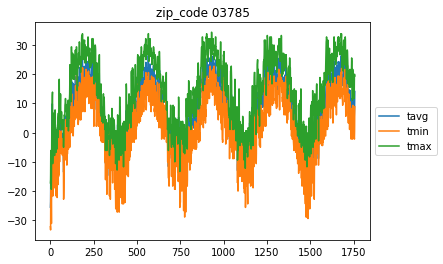

04210


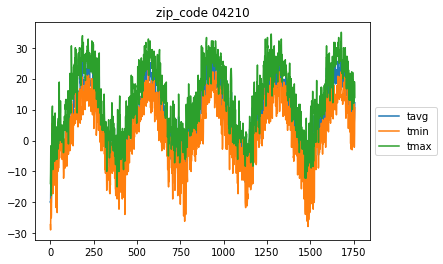

04330


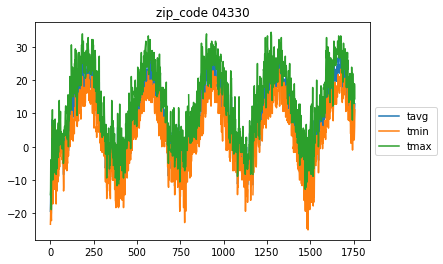

01776


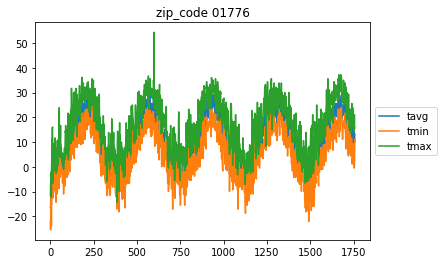

02169


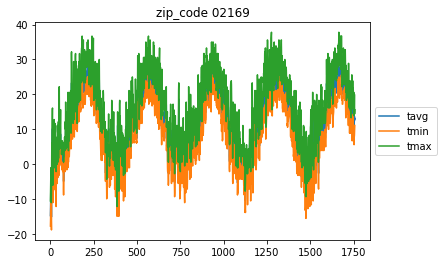

04072


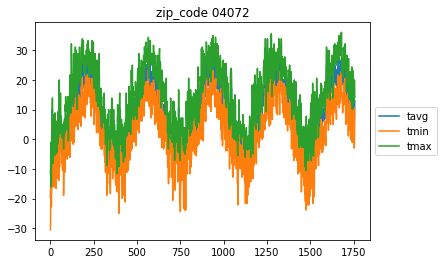

02189


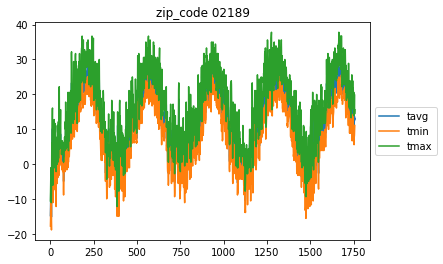

03038


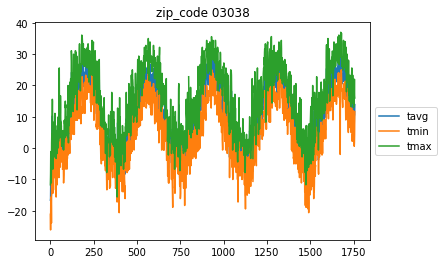

02460


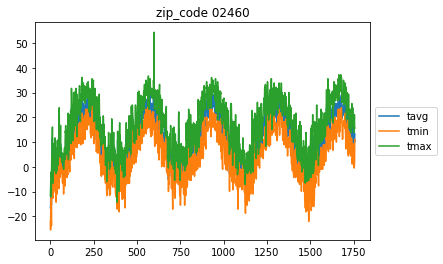

02038


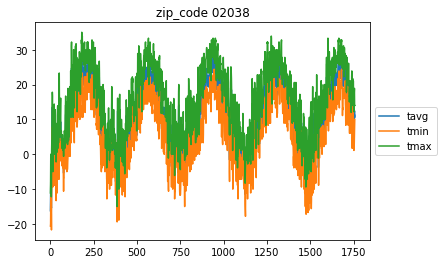

02215


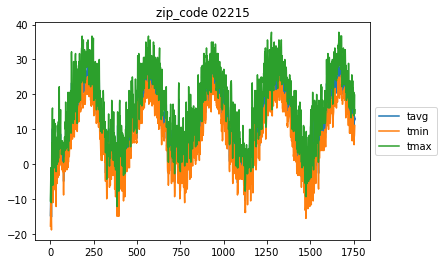

01915


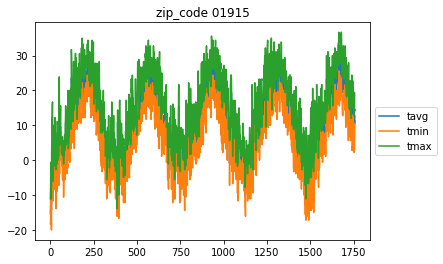

04105


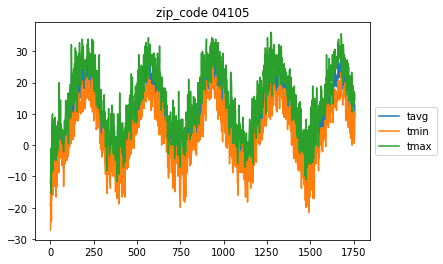

04605


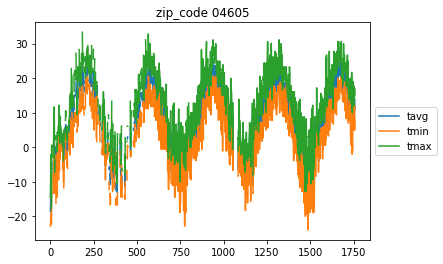

03060


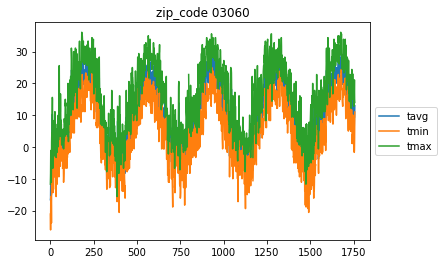

05403


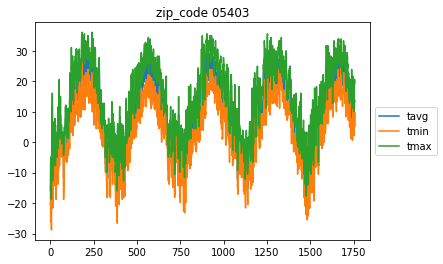

02140


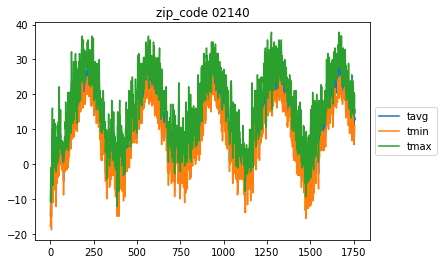

05363


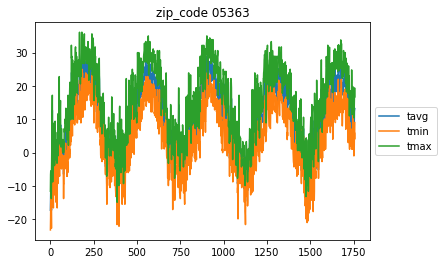

05673


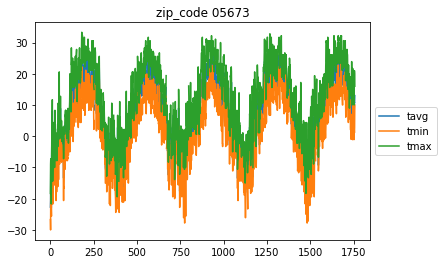

02026


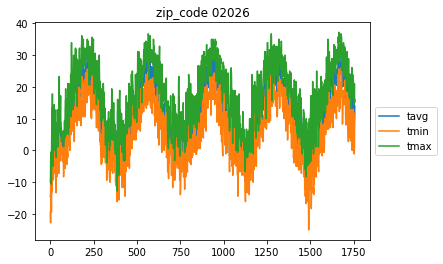

02021


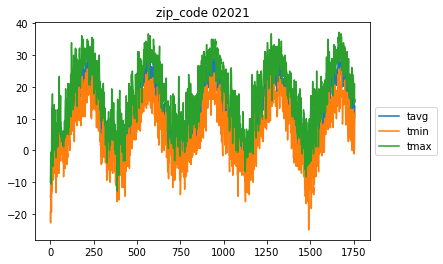

02048


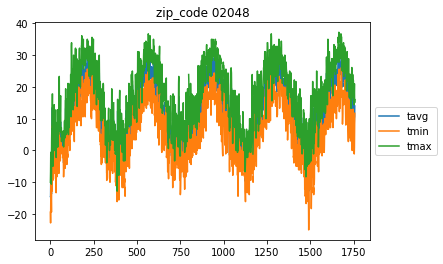

02339


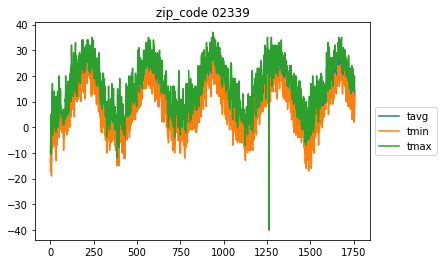

02886


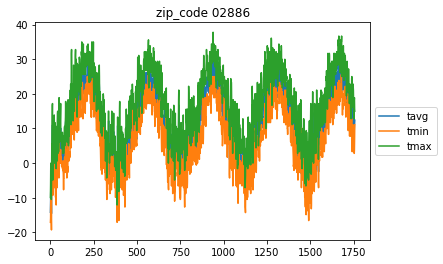

03053


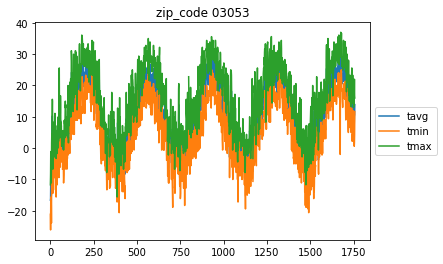

01803


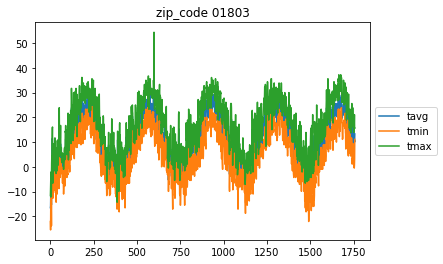

05060


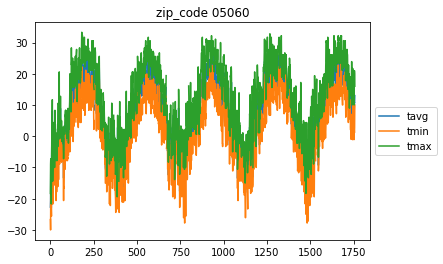

05255


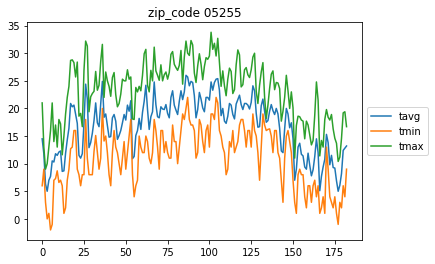

02536


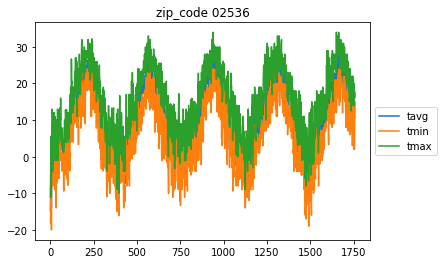

04032


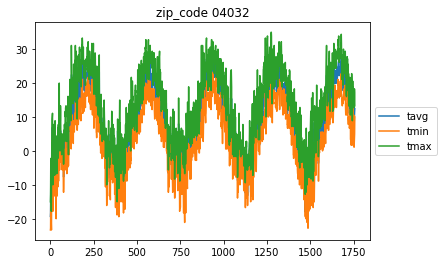

05829


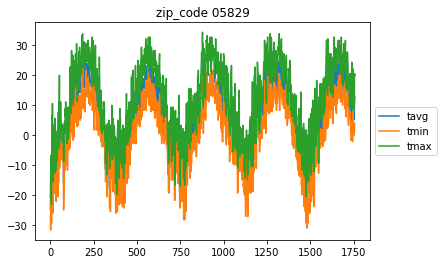

03885


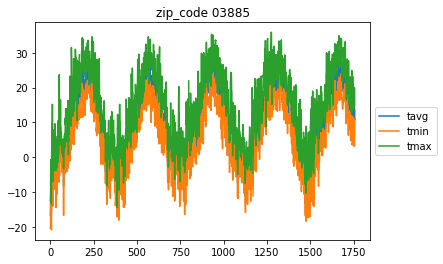

01603


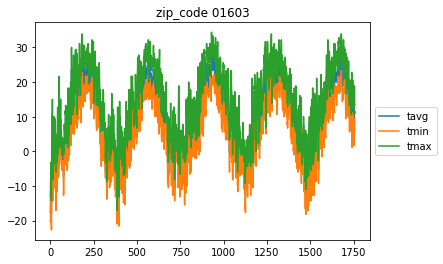

01605


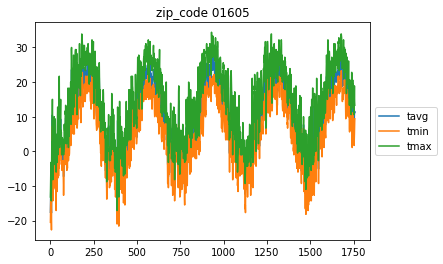

02920


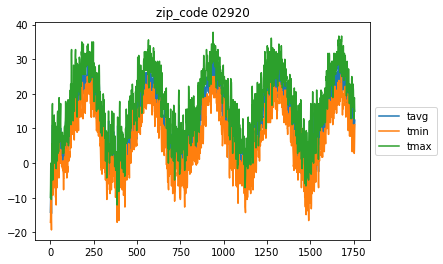

01450


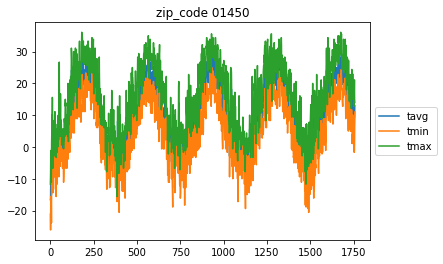

04011


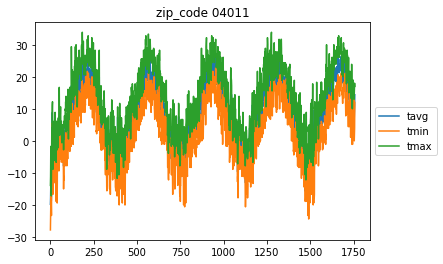

04426
02467


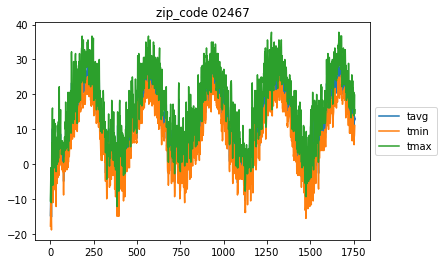

05676


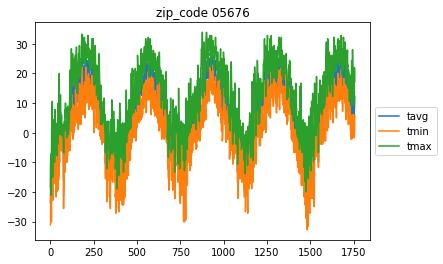

01510


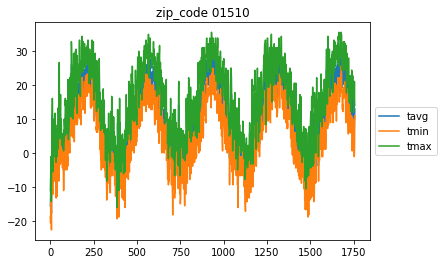

03054


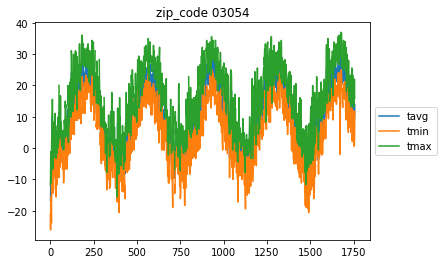

02653


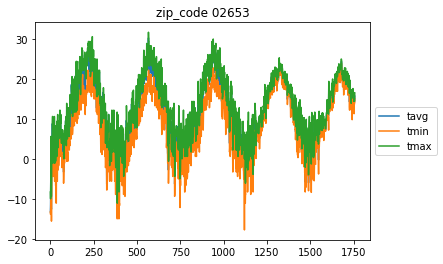

03301


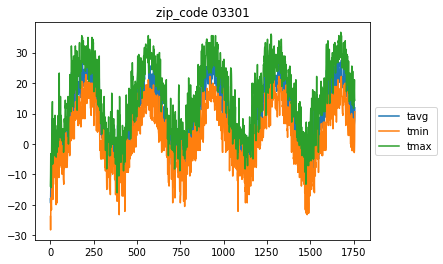

02128


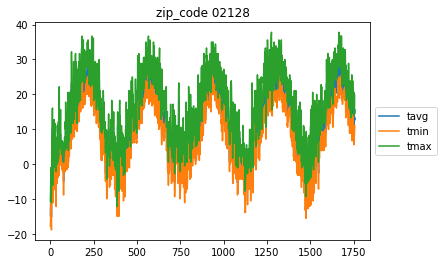

05753


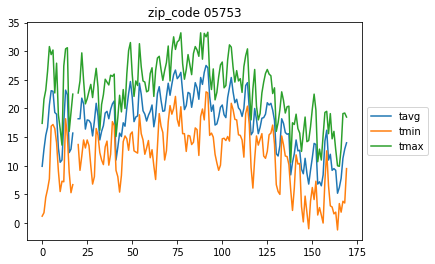

05764


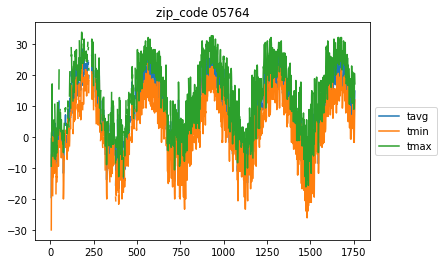

05743


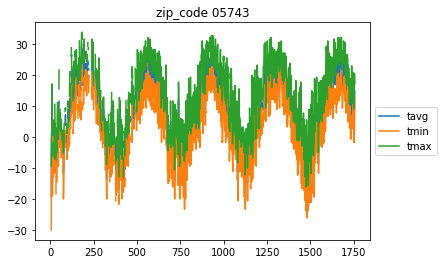

02349


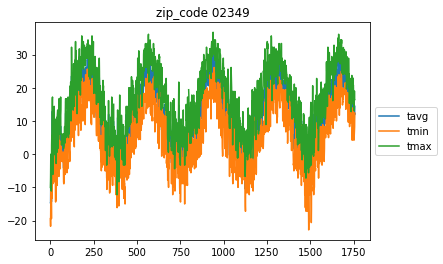

02184


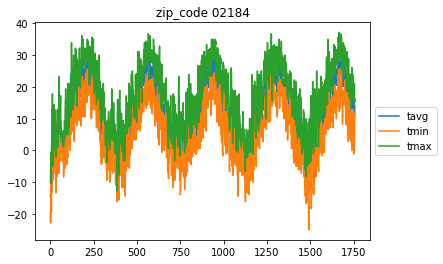

02760


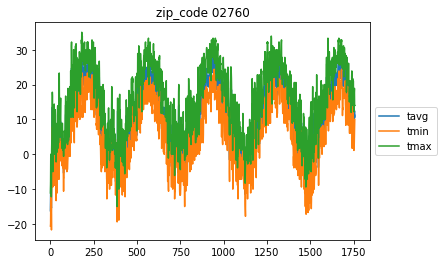

02368


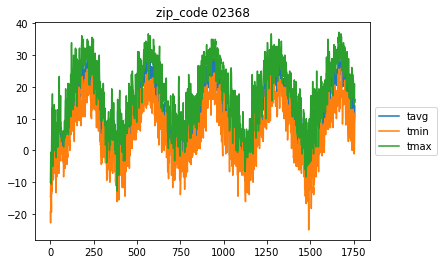

02767


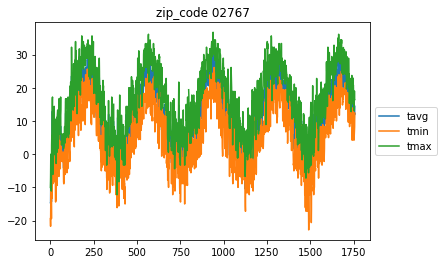

02301


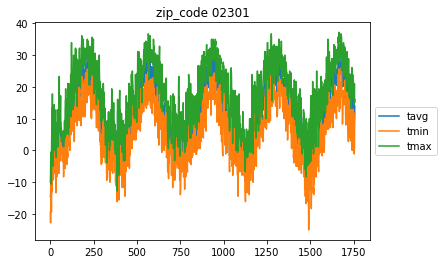

02053


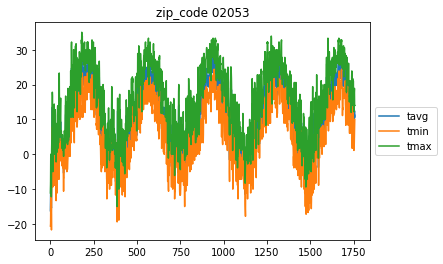

01588


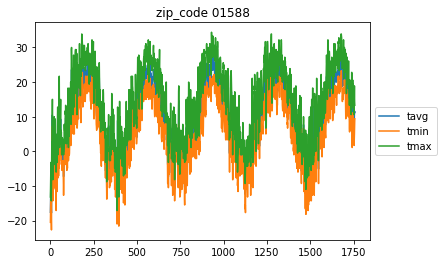

02806


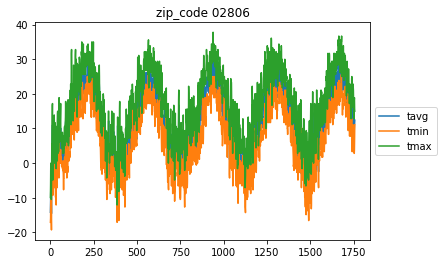

02842


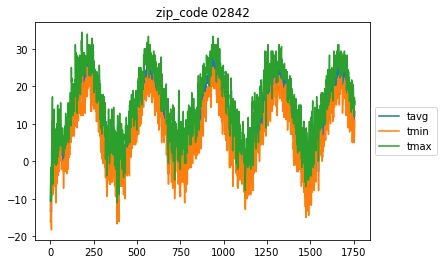

02601


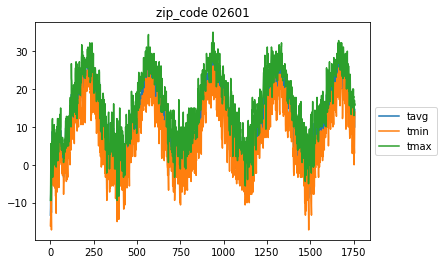

04578


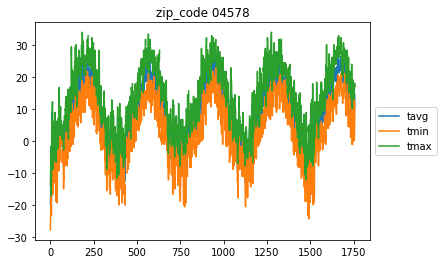

02330


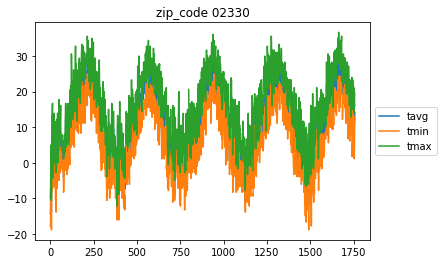

03220


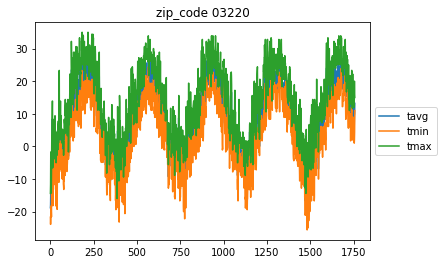

05672


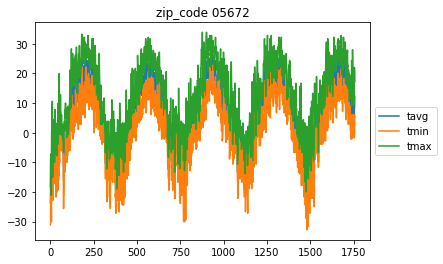

03818
02356


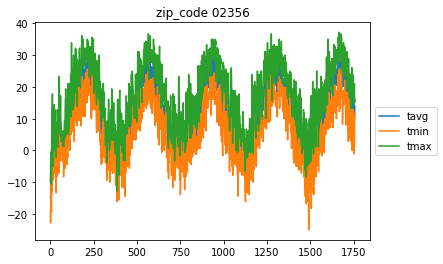

02879


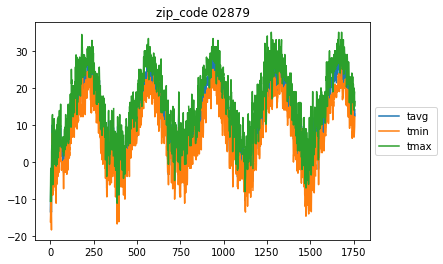

01545


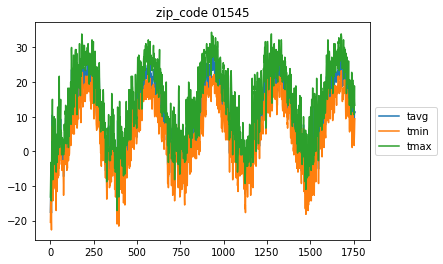

01566


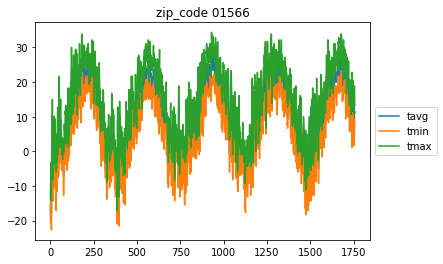

01960


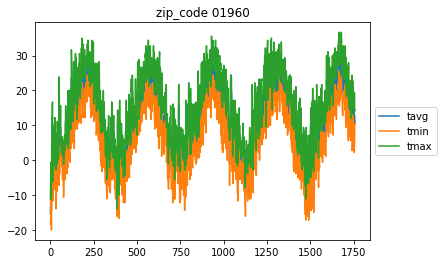

03820


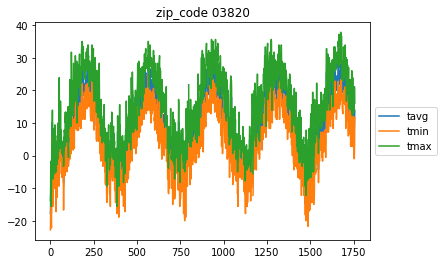

01950


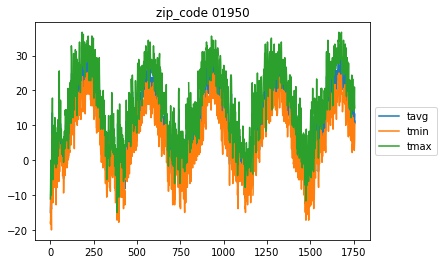

03055


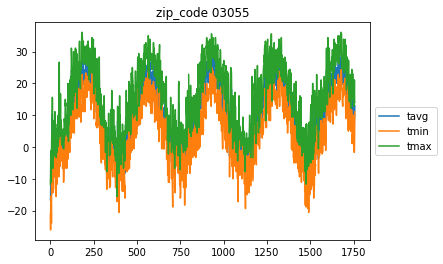

01970


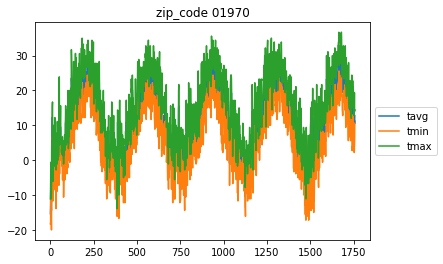

05149


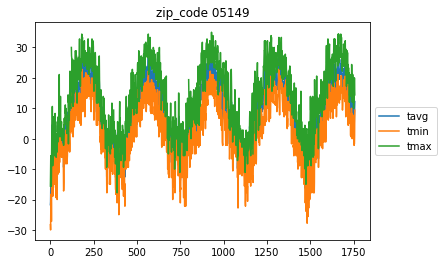

05156


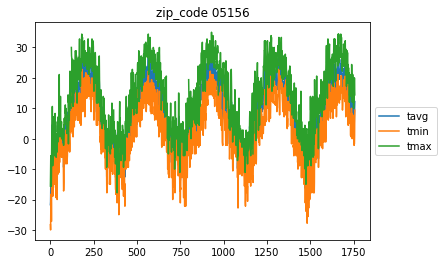

03584
05491


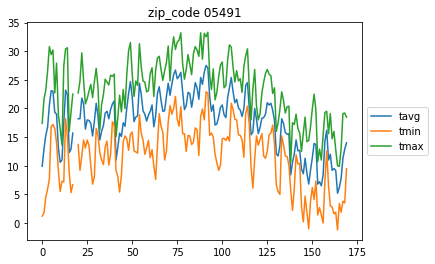

04062


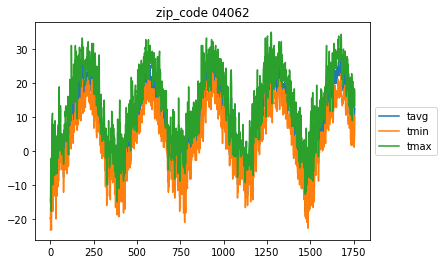

04103


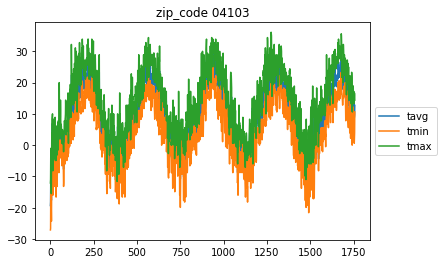

04074


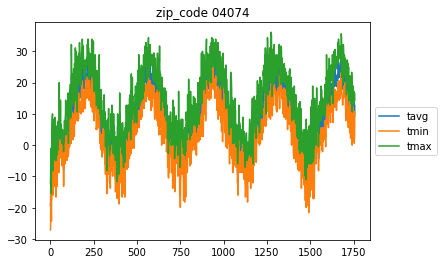

02138


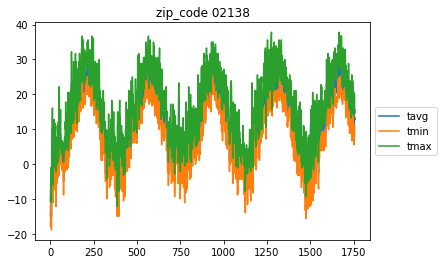

02452


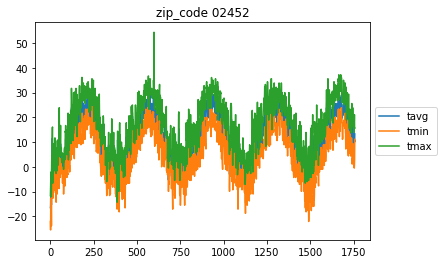

02145


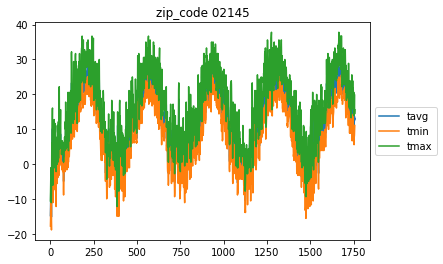

02136


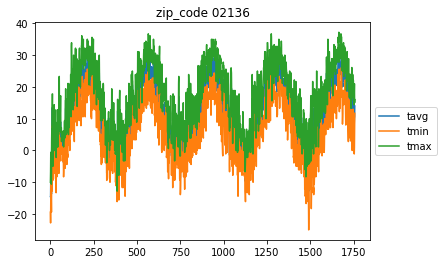

02478


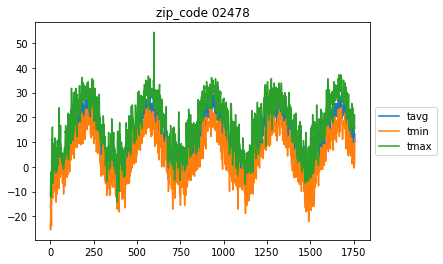

01775


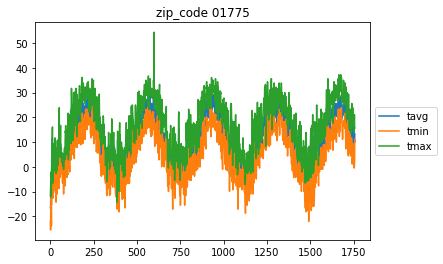

02360


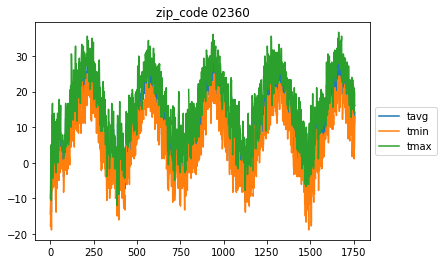

02050


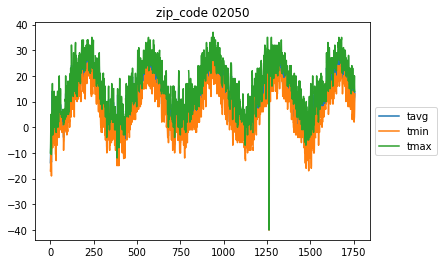

03561


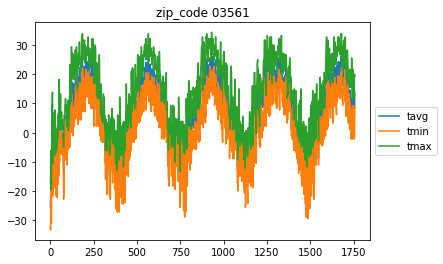

02571


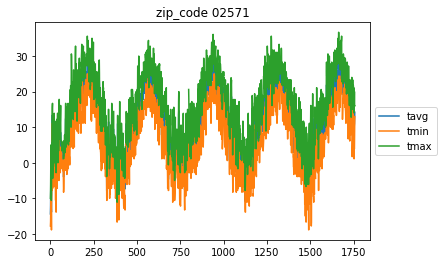

01749


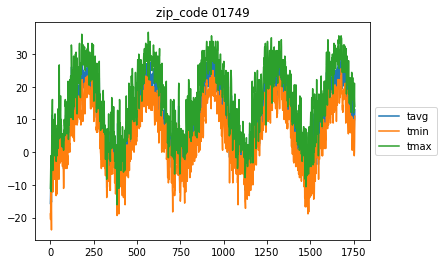

02915


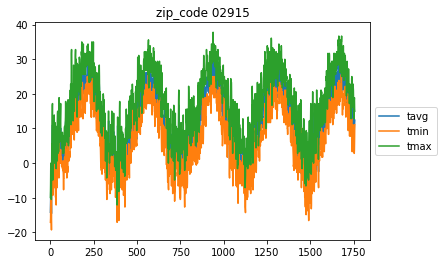

02176


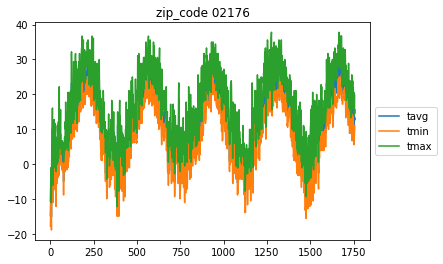

05443


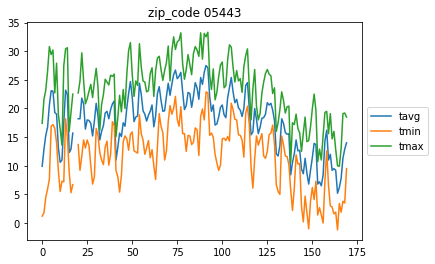

03608


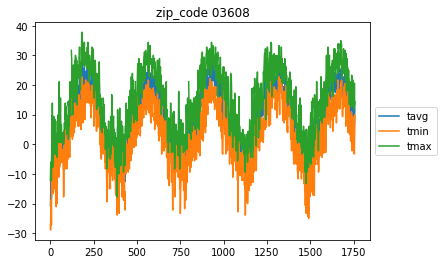

04106


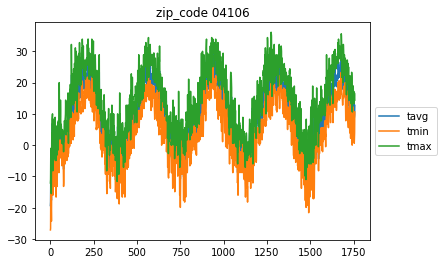

04841


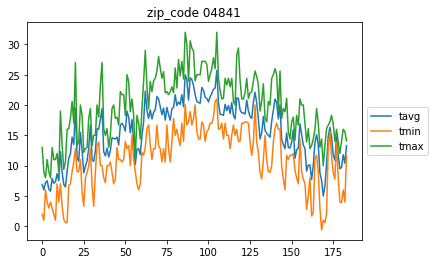

04901


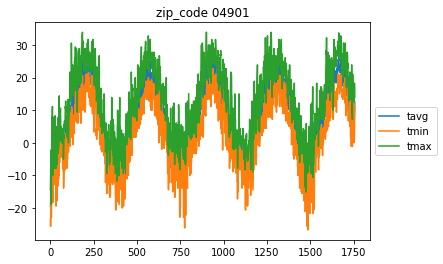

02445


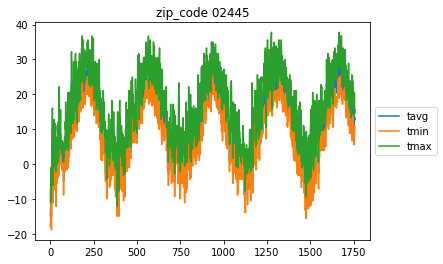

02062


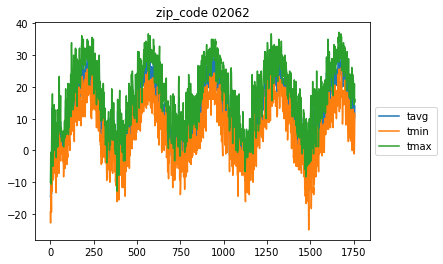

02132


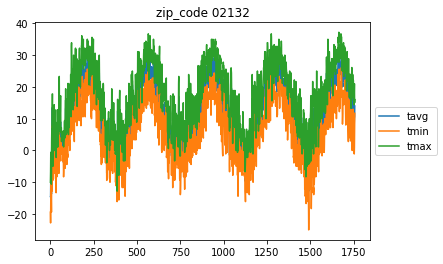

02143


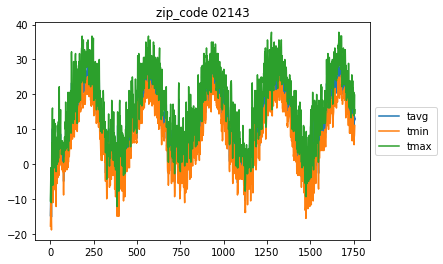

01930


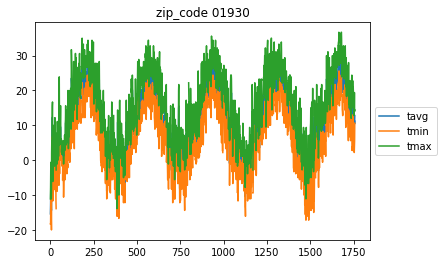

01880


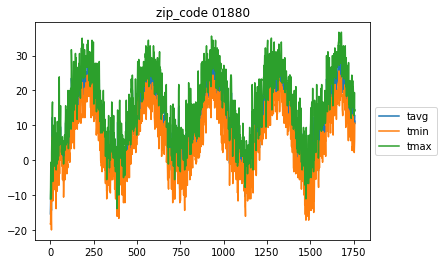

03865


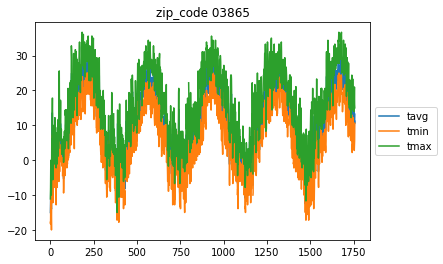

02914


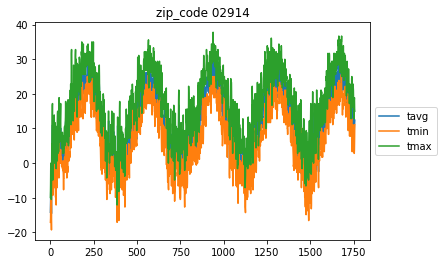

02664


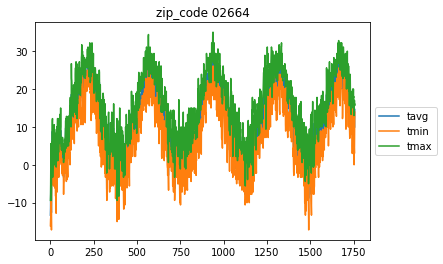

02114


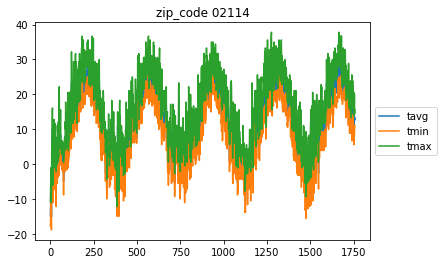

02302


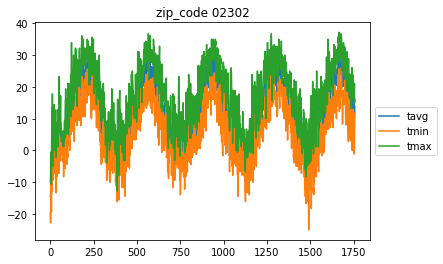

02904


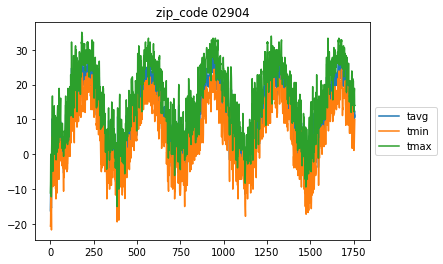

01501


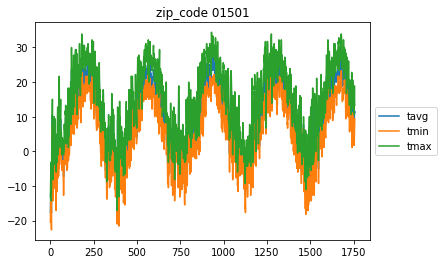

03106


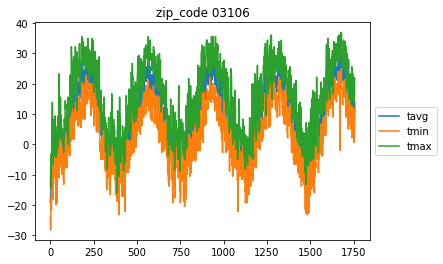

03862


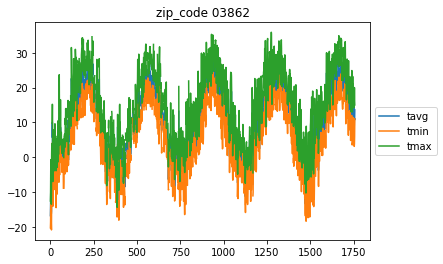

03244


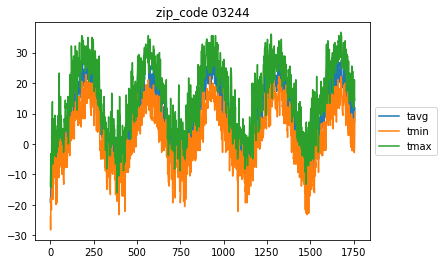

03773


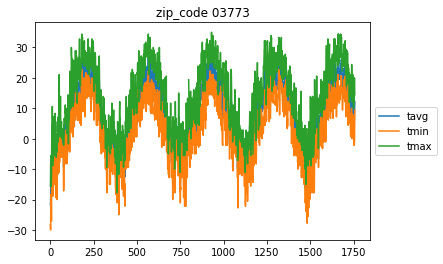

04102


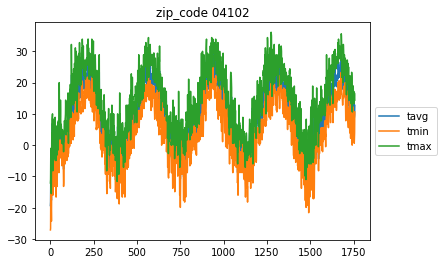

03784


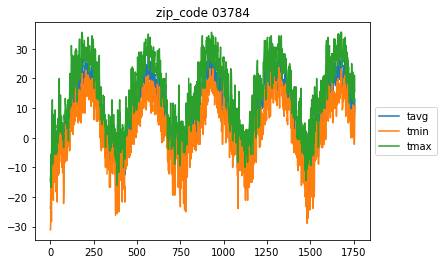

04401


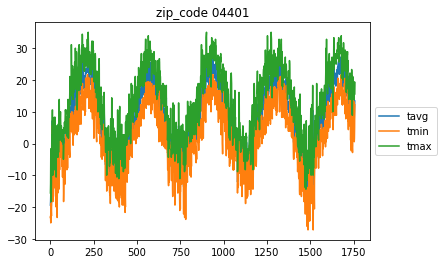

04240


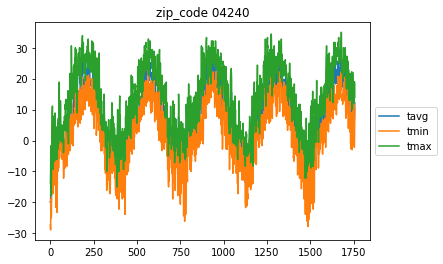

04073


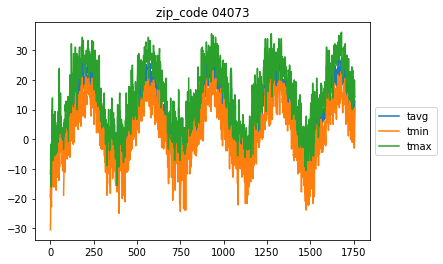

02466


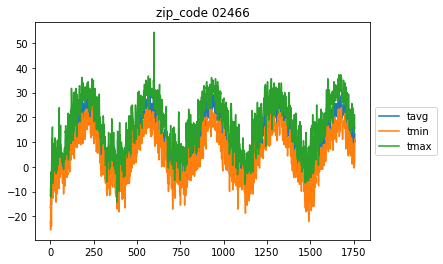

02135


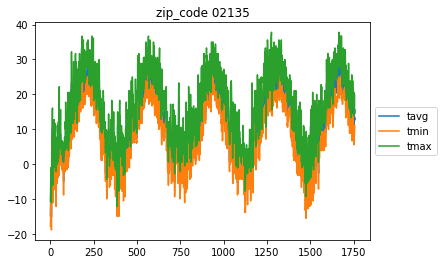

02125


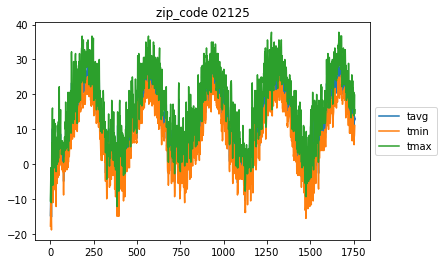

01938


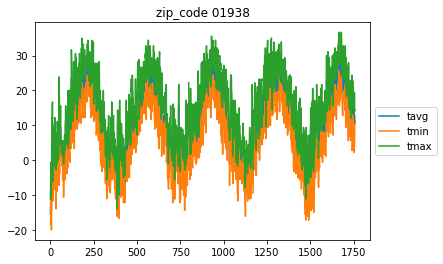

02646


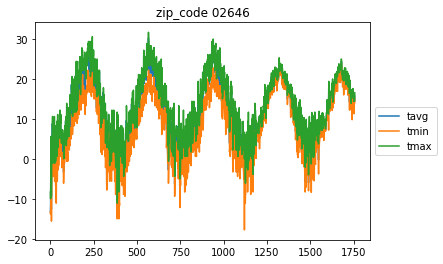

03458


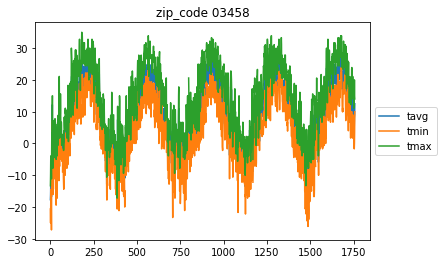

time  tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  \
0     2018-01-01 -22.7 -26.7 -18.3   NaN   NaN    NaN  10.3   NaN  1026.9   
1     2018-01-02 -20.6 -30.0  -8.9   NaN   NaN    NaN   6.4   NaN     NaN   
2     2018-01-03 -10.5 -13.9  -7.2   NaN   NaN    NaN  10.2   NaN  1022.1   
3     2018-01-04 -11.9 -15.0  -8.9   NaN   NaN    NaN  12.8   NaN     NaN   
4     2018-01-05 -18.9 -21.7 -11.1   NaN   NaN  315.0  21.6   NaN     NaN   
...          ...   ...   ...   ...   ...   ...    ...   ...   ...     ...   
1753  2022-10-20   5.9  -1.0  12.2   0.0   NaN  209.0  12.8   NaN  1012.7   
1754  2022-10-21   5.6  -1.7  15.0   0.0   NaN  225.0   6.6   NaN  1019.8   
1755  2022-10-22   8.2   0.0  20.0   0.0   NaN  208.0   7.3   NaN  1024.8   
1756  2022-10-23   9.0   3.3  15.0   1.8   NaN   16.0   3.4   NaN  1027.8   
1757  2022-10-24  12.5  10.0  14.0   1.5   NaN   42.0   6.0   NaN  1024.6   

      tsun      lat    long    zip  
0      NaN  44.2641 -72.577  05602  
1      NaN  44.2641 -72.577  05602  
2      NaN  44.2641 -72.577  05602  
3      NaN  44.2641 -72.577  05602  
4      NaN  44.2641 -72.577  05602  
...    ...      ...     ...    ...  
1753   NaN  42.8856 -71.947  03458  
1754   NaN  42.8856 -71.947  03458  
1755   NaN  42.8856 -71.947  03458  
1756   NaN  42.8856 -71.947  03458  
1757   NaN  42.8856 -71.947  03458  

[236447 rows x 14 columns]

In [19]:
us_zip = pgeocode.Nominatim('us')
temp_df = pd.DataFrame()
addr_weather_df = pd.DataFrame()
lat_long_list = []
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2022, 10, 24)
err_list = []
for zip in df_zip['zipcode'].values.tolist():
    print(zip)
    lat, long = us_zip.query_postal_code(zip)[9:11][0], us_zip.query_postal_code(zip)[9:11][1]
    lat_long_list.append((lat, long))
    location = Point(lat, long)
    data = Daily(location, start, end)
    data = data.fetch()
    if len(data) == 0:
        err_list.append(zip)
        continue
    data.reset_index(inplace = True)
    data['lat'] = lat
    data['long'] = long
    data['zip'] = zip
    addr_weather_df = addr_weather_df.append(data)
    data.plot(y=['tavg', 'tmin', 'tmax'])
    plt.title('zip_code ' + zip)
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.show()
    
addr_weather_df['time'] = addr_weather_df['time'].apply(lambda x : x.strftime("%Y-%m-%d"))
addr_weather_df

# **Error List**

In [20]:
err_list

['04426', '03818', '03584']

Combining weather with weather at a zipcode.

# **Combining Weather Data along with Historical Weather Details**

In [21]:
df_weather_consolidated = pd.merge(df_weather, addr_weather_df, how = 'inner', left_on = ['zip5', 'day_dt'], right_on = ['zip', 'time'])
df_weather_consolidated

zip5      day_dt  high_temperature_amt  low_temperature_amt  sky_cd  \
0     02747  2019-03-20                  52.2                 21.7       1   
1     02747  2019-03-21                  53.1                 31.7      12   
2     02747  2019-03-22                  45.1                 38.6      18   
3     02747  2019-03-23                  52.2                 32.7      32   
4     02747  2019-03-24                  59.1                 25.7       3   
...     ...         ...                   ...                  ...     ...   
2625  05673  2022-10-20                  53.7                 34.2      17   
2626  05673  2022-10-21                  55.3                 29.9       3   
2627  05673  2022-10-22                  62.3                 35.9       1   
2628  05673  2022-10-23                  62.1                 35.9       3   
2629  05673  2022-10-24                  57.1                 41.6      18   

      precipitation_cd  temperature_cd  air_cd uv_index_dsc  wind_speed_amt  \
0                    0               6      22          LOW            17.9   
1                   66               6      30      MINIMAL            32.8   
2                    7               6      32      MINIMAL            29.8   
3                    0               6      30          LOW            35.8   
4                    0               7      30          LOW            32.8   
...                ...             ...     ...          ...             ...   
2625                 0               6       0      MINIMAL            29.8   
2626                 0               6       0      MINIMAL            17.9   
2627                 0               8      20      MINIMAL            14.9   
2628                65               6      20      MINIMAL             3.0   
2629                 5               6      32      MINIMAL             3.0   

      ...  prcp  snow   wdir  wspd  wpgt    pres tsun      lat     long    zip  
0     ...   0.0   NaN    NaN   9.9   NaN  1028.8  NaN  41.6338 -70.9958  02747  
1     ...   0.0   NaN  123.0  13.2   NaN  1020.7  NaN  41.6338 -70.9958  02747  
2     ...   NaN   NaN  333.0  23.2   NaN   992.2  NaN  41.6338 -70.9958  02747  
3     ...   NaN   NaN  283.0  31.6   NaN  1001.4  NaN  41.6338 -70.9958  02747  
4     ...   0.0   NaN    NaN  16.6   NaN  1016.7  NaN  41.6338 -70.9958  02747  
...   ...   ...   ...    ...   ...   ...     ...  ...      ...      ...    ...  
2625  ...   0.0   NaN  197.0  11.8   NaN  1011.7  NaN  44.1889 -72.8283  05673  
2626  ...   0.0   NaN  178.0  10.2   NaN  1019.2  NaN  44.1889 -72.8283  05673  
2627  ...   0.0   NaN  158.0   9.5   NaN  1023.8  NaN  44.1889 -72.8283  05673  
2628  ...   0.0   NaN   30.0   3.0   NaN  1028.7  NaN  44.1889 -72.8283  05673  
2629  ...   0.0   NaN    5.0   3.0   NaN  1025.9  NaN  44.1889 -72.8283  05673  

[2630 rows x 32 columns]

In [22]:
df_weather_consolidated.iloc[0]

zip5                                  02747
day_dt                           2019-03-20
high_temperature_amt                   52.2
low_temperature_amt                    21.7
sky_cd                                    1
precipitation_cd                          0
temperature_cd                            6
air_cd                                   22
uv_index_dsc                            LOW
wind_speed_amt                         17.9
humidity_pct                             29
dew_point_amt                          19.2
rain_fall_amt                           0.0
snow_fall_amt                           0.0
comfort_index_amt                      46.1
precipitation_probability_pct             0
feed_cd                                 OTH
store_id                                619
time                             2019-03-20
tavg                                    1.9
tmin                                   -6.1
tmax                                    8.9
prcp                            

In [23]:
df_weather_consolidated['avg_temperature_amt'] = (df_weather_consolidated['high_temperature_amt'] + df_weather_consolidated['low_temperature_amt'] )/ 2
df_weather_consolidated['historic_tmin'] = df_weather_consolidated['tmin'].apply(lambda x : ((9 * x) / 5) + 32)
df_weather_consolidated['historic_tmax'] = df_weather_consolidated['tmax'].apply(lambda x : ((9 * x) / 5) + 32)
df_weather_consolidated['historic_tavg'] = df_weather_consolidated['tavg'].apply(lambda x : ((9 * x) / 5) + 32)

In [24]:
df_weather_consolidated.iloc[0]

zip5                                  02747
day_dt                           2019-03-20
high_temperature_amt                   52.2
low_temperature_amt                    21.7
sky_cd                                    1
precipitation_cd                          0
temperature_cd                            6
air_cd                                   22
uv_index_dsc                            LOW
wind_speed_amt                         17.9
humidity_pct                             29
dew_point_amt                          19.2
rain_fall_amt                           0.0
snow_fall_amt                           0.0
comfort_index_amt                      46.1
precipitation_probability_pct             0
feed_cd                                 OTH
store_id                                619
time                             2019-03-20
tavg                                    1.9
tmin                                   -6.1
tmax                                    8.9
prcp                            

# **Combining Weather and Holiday Data Together**

In [25]:
df_weather_consolidated = pd.merge(df_weather_consolidated, df_holiday_combined[df_holiday_combined.level == 'FE'], how = 'left', left_on = 'day_dt', right_on = 'date')
df_weather_consolidated.columns

Index(['zip5', 'day_dt', 'high_temperature_amt', 'low_temperature_amt',
       'sky_cd', 'precipitation_cd', 'temperature_cd', 'air_cd',
       'uv_index_dsc', 'wind_speed_amt', 'humidity_pct', 'dew_point_amt',
       'rain_fall_amt', 'snow_fall_amt', 'comfort_index_amt',
       'precipitation_probability_pct', 'feed_cd', 'store_id', 'time', 'tavg',
       'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres', 'tsun',
       'lat', 'long', 'zip', 'avg_temperature_amt', 'historic_tmin',
       'historic_tmax', 'historic_tavg', 'level', 'year', 'date',
       'holiday_name'],
      dtype='object')

In [26]:
df_weather_consolidated.iloc[0]

zip5                                  02747
day_dt                           2019-03-20
high_temperature_amt                   52.2
low_temperature_amt                    21.7
sky_cd                                    1
precipitation_cd                          0
temperature_cd                            6
air_cd                                   22
uv_index_dsc                            LOW
wind_speed_amt                         17.9
humidity_pct                             29
dew_point_amt                          19.2
rain_fall_amt                           0.0
snow_fall_amt                           0.0
comfort_index_amt                      46.1
precipitation_probability_pct             0
feed_cd                                 OTH
store_id                                619
time                             2019-03-20
tavg                                    1.9
tmin                                   -6.1
tmax                                    8.9
prcp                            

In [27]:
'''
df_weather_refined = df_weather_consolidated[['zip5', 'day_dt', 'high_temperature_amt', 'low_temperature_amt', 'avg_temperature_amt',
                                              'historic_tmin', 'historic_tmax', 'historic_tavg', 'date', 'store_id']]
'''
df_weather_consolidated['holiday_ind'] = np.where(df_weather_consolidated['date'].isna(),0,1)
df_weather_refined = df_weather_consolidated[['zip5', 'day_dt', 'high_temperature_amt', 'low_temperature_amt', 'avg_temperature_amt',
                                              'historic_tmin', 'historic_tmax', 'historic_tavg', 'holiday_ind', 'store_id']]

In [28]:
df_weather_refined.iloc[0]

zip5                         02747
day_dt                  2019-03-20
high_temperature_amt          52.2
low_temperature_amt           21.7
avg_temperature_amt          36.95
historic_tmin                21.02
historic_tmax                48.02
historic_tavg                35.42
holiday_ind                      0
store_id                       619
Name: 0, dtype: object

In [29]:
df_weather_refined[df_weather_refined.zip5.isin(['02747','05673','05764'])]

zip5      day_dt  high_temperature_amt  low_temperature_amt  \
0     02747  2019-03-20                  52.2                 21.7   
1     02747  2019-03-21                  53.1                 31.7   
2     02747  2019-03-22                  45.1                 38.6   
3     02747  2019-03-23                  52.2                 32.7   
4     02747  2019-03-24                  59.1                 25.7   
...     ...         ...                   ...                  ...   
2625  05673  2022-10-20                  53.7                 34.2   
2626  05673  2022-10-21                  55.3                 29.9   
2627  05673  2022-10-22                  62.3                 35.9   
2628  05673  2022-10-23                  62.1                 35.9   
2629  05673  2022-10-24                  57.1                 41.6   

      avg_temperature_amt  historic_tmin  historic_tmax  historic_tavg  \
0                   36.95          21.02          48.02          35.42   
1                   42.40          26.96          48.02          40.82   
2                   41.85          37.94          44.06          41.18   
3                   42.45          30.92          46.94          38.12   
4                   42.40          26.06          53.06          40.82   
...                   ...            ...            ...            ...   
2625                43.95          37.40          50.00          43.70   
2626                42.60          35.60          57.92          46.22   
2627                49.10          33.98          69.80          51.44   
2628                49.00          37.04          68.00          51.26   
2629                49.35          50.00          60.80          55.40   

      holiday_ind  store_id  
0               0       619  
1               0       619  
2               0       619  
3               0       619  
4               0       619  
...           ...       ...  
2625            0       326  
2626            0       326  
2627            0       326  
2628            0       326  
2629            0       326  

[2630 rows x 10 columns]

In [30]:
df_weather_refined.columns

Index(['zip5', 'day_dt', 'high_temperature_amt', 'low_temperature_amt',
       'avg_temperature_amt', 'historic_tmin', 'historic_tmax',
       'historic_tavg', 'holiday_ind', 'store_id'],
      dtype='object')

# **Get Transaction Data at Store-CSC-Day Level**

In [31]:
#df_txn_1 = pd.read_csv('result_txn_1.csv')
#df_txn_2 = pd.read_csv('result_txn_2.csv')
#df_txn_1.columns = [col.lower() for col in df_txn_1.columns]
#df_txn_2.columns = [col.lower() for col in df_txn_2.columns]
df_txn = pd.read_csv('result_txn_619_326_3087.csv')
df_txn.columns = [col.lower() for col in df_txn.columns]
df_txn['eff_price'] = np.where((df_txn['promo_unit_prc'] == 0) | (df_txn['promo_unit_prc'].isna()), df_txn['reg_unit_prc'], df_txn['promo_unit_prc'])
df_txn['promo_depth'] = df_txn['eff_price'] / df_txn['reg_unit_prc']
df_txn.head()

txn_dte  consumer_selling_cd  smic_group_cd  store_id  reg_unit_prc  \
0  2020-01-01               146385             25       619          1.99   
1  2020-01-01               146393             25       619          1.99   
2  2020-01-01               146399             25       619          1.99   
3  2020-01-01               146408             25       619          2.69   
4  2020-01-01               146408             25      3087          2.69   

   promo_unit_prc  total_gross_amt  total_item_qty  total_mkdn_qty  \
0            1.79             9.95               5               5   
1             NaN            15.92               8               8   
2             NaN            37.81              19              21   
3             NaN             5.38               2               0   
4             NaN            13.45               5               0   

   total_mkdn_amt  total_net_amt  total_mkdn_wod_alloc_amt  \
0           -1.00           8.95                       0.0   
1           -2.58          13.34                       0.0   
2           -6.45          31.36                       0.0   
3            0.00           5.38                       0.0   
4            0.00          13.45                       0.0   

   total_mkdn_pod_alloc_amt  eff_price  promo_depth  
0                       0.0       1.79     0.899497  
1                       0.0       1.99     1.000000  
2                       0.0       1.99     1.000000  
3                       0.0       2.69     1.000000  
4                       0.0       2.69     1.000000

In [32]:
df_txn[df_txn['promo_depth'] < 1].head()

txn_dte  consumer_selling_cd  smic_group_cd  store_id  reg_unit_prc  \
0   2020-01-01               146385             25       619          1.99   
15  2020-01-01               322058             11       619          3.99   
17  2020-01-01               322058             11      3087          3.99   
18  2020-01-01               322060             11       326          4.99   
29  2020-01-01               460913             11       326          4.99   

    promo_unit_prc  total_gross_amt  total_item_qty  total_mkdn_qty  \
0             1.79             9.95               5               5   
15            2.99            10.47               3               3   
17            2.99             6.98               2               2   
18            4.69             4.99               1               1   
29            4.69             4.99               1               1   

    total_mkdn_amt  total_net_amt  total_mkdn_wod_alloc_amt  \
0             -1.0           8.95                       0.0   
15            -1.5           8.97                       0.0   
17            -1.0           5.98                       0.0   
18            -0.3           4.69                       0.0   
29            -0.3           4.69                       0.0   

    total_mkdn_pod_alloc_amt  eff_price  promo_depth  
0                        0.0       1.79     0.899497  
15                       0.0       2.99     0.749373  
17                       0.0       2.99     0.749373  
18                       0.0       4.69     0.939880  
29                       0.0       4.69     0.939880

In [33]:
len(df_txn[['consumer_selling_cd']].drop_duplicates())

33

In [34]:
df_weather_refined['day_dt'].min(), df_txn['txn_dte'].min()

('2019-03-20', '2020-01-01')

In [35]:
df_txn.groupby(['store_id','consumer_selling_cd']).agg({'txn_dte': np.min})

txn_dte
store_id consumer_selling_cd            
326      146399               2020-01-03
         146408               2020-01-03
         146629               2020-01-02
         146761               2020-01-03
         146835               2020-01-03
         147065               2020-01-01
         322059               2020-01-01
         322060               2020-01-01
         322082               2020-01-01
         322087               2020-01-02
         322325               2020-01-03
         322389               2020-01-02
         322390               2020-01-01
         322455               2020-01-02
         410691               2020-01-01
         460651               2020-01-01
         460913               2020-01-01
         461103               2020-12-18
         466564               2020-01-01
         778229               2020-01-01
619      146385               2020-01-01
         146393               2020-01-01
         146399               2020-01-01
         146408               2020-01-01
         146453               2020-01-01
         146629               2020-01-01
         146675               2020-01-01
         146761               2020-01-02
         146835               2020-01-01
         322045               2020-01-01
         322058               2020-01-01
         322059               2020-01-01
         322060               2020-01-01
         322082               2020-01-02
         322087               2020-01-01
         322554               2020-01-01
         322557               2020-01-03
         322625               2020-01-02
         413364               2020-07-12
         460913               2020-01-02
3087     146404               2020-01-01
         146408               2020-01-01
         146453               2020-01-02
         146629               2020-01-01
         146675               2020-01-04
         146761               2020-01-03
         146835               2020-01-01
         322045               2020-01-02
         322058               2020-01-01
         322059               2020-01-02
         322060               2020-01-04
         322082               2020-01-01
         322087               2020-01-04
         322325               2020-01-02
         322554               2020-01-01
         322557               2020-01-01
         437609               2020-01-02
         460913               2020-01-01
         464561               2020-01-02
         778229               2020-01-01

In [36]:
top_csc_list = df_txn['consumer_selling_cd'].drop_duplicates().tolist()
top_csc_list

[146385,
 146393,
 146399,
 146408,
 146404,
 146453,
 146629,
 146675,
 146835,
 147065,
 322045,
 322059,
 322058,
 322060,
 322082,
 322087,
 322390,
 322554,
 322557,
 410691,
 460651,
 460913,
 466564,
 778229,
 146761,
 322325,
 322389,
 322455,
 322625,
 437609,
 464561,
 413364,
 461103]

In [37]:
df_weather_txn_combined = pd.merge(df_weather_refined[df_weather_refined.day_dt >= '2020-01-01'], df_txn, how='inner', left_on=['day_dt', 'store_id'], right_on=['txn_dte', 'store_id'])
df_weather_txn_combined.drop(columns = ['txn_dte'], axis = 1, inplace = True)
df_weather_txn_combined.columns

Index(['zip5', 'day_dt', 'high_temperature_amt', 'low_temperature_amt',
       'avg_temperature_amt', 'historic_tmin', 'historic_tmax',
       'historic_tavg', 'holiday_ind', 'store_id', 'consumer_selling_cd',
       'smic_group_cd', 'reg_unit_prc', 'promo_unit_prc', 'total_gross_amt',
       'total_item_qty', 'total_mkdn_qty', 'total_mkdn_amt', 'total_net_amt',
       'total_mkdn_wod_alloc_amt', 'total_mkdn_pod_alloc_amt', 'eff_price',
       'promo_depth'],
      dtype='object')

In [38]:
df_weather_txn_combined.iloc[0]

zip5                             02747
day_dt                      2020-01-01
high_temperature_amt              41.2
low_temperature_amt               29.7
avg_temperature_amt              35.45
historic_tmin                    33.08
historic_tmax                    42.08
historic_tavg                    37.76
holiday_ind                          1
store_id                           619
consumer_selling_cd             146385
smic_group_cd                       25
reg_unit_prc                      1.99
promo_unit_prc                    1.79
total_gross_amt                   9.95
total_item_qty                       5
total_mkdn_qty                       5
total_mkdn_amt                    -1.0
total_net_amt                     8.95
total_mkdn_wod_alloc_amt           0.0
total_mkdn_pod_alloc_amt           0.0
eff_price                         1.79
promo_depth                   0.899497
Name: 0, dtype: object

In [39]:
#try with z transformation as well and add info on the dataset
df_weather_txn_combined['log_total_item_qty'] = np.log(df_weather_txn_combined['total_item_qty'] + 1)
df_weather_txn_combined['log_avg_temperature_amt'] = np.log(df_weather_txn_combined['avg_temperature_amt'] + 1)
df_weather_txn_combined['log_historic_tavg'] = np.log(df_weather_txn_combined['historic_tavg'] + 1)
df_weather_txn_combined['log_historic_tmin'] = np.log(df_weather_txn_combined['historic_tmin'] + 1)
df_weather_txn_combined['log_historic_tmax'] = np.log(df_weather_txn_combined['historic_tmax'] + 1)
df_weather_txn_combined['log_eff_price'] = np.log(df_weather_txn_combined['eff_price'] + 1)
df_weather_txn_combined.set_index('day_dt', inplace = True)


In [40]:
df_weather_txn_combined.columns

Index(['zip5', 'high_temperature_amt', 'low_temperature_amt',
       'avg_temperature_amt', 'historic_tmin', 'historic_tmax',
       'historic_tavg', 'holiday_ind', 'store_id', 'consumer_selling_cd',
       'smic_group_cd', 'reg_unit_prc', 'promo_unit_prc', 'total_gross_amt',
       'total_item_qty', 'total_mkdn_qty', 'total_mkdn_amt', 'total_net_amt',
       'total_mkdn_wod_alloc_amt', 'total_mkdn_pod_alloc_amt', 'eff_price',
       'promo_depth', 'log_total_item_qty', 'log_avg_temperature_amt',
       'log_historic_tavg', 'log_historic_tmin', 'log_historic_tmax',
       'log_eff_price'],
      dtype='object')

In [41]:
df_weather_txn_combined.iloc[0]

zip5                           02747
high_temperature_amt            41.2
low_temperature_amt             29.7
avg_temperature_amt            35.45
historic_tmin                  33.08
historic_tmax                  42.08
historic_tavg                  37.76
holiday_ind                        1
store_id                         619
consumer_selling_cd           146385
smic_group_cd                     25
reg_unit_prc                    1.99
promo_unit_prc                  1.79
total_gross_amt                 9.95
total_item_qty                     5
total_mkdn_qty                     5
total_mkdn_amt                  -1.0
total_net_amt                   8.95
total_mkdn_wod_alloc_amt         0.0
total_mkdn_pod_alloc_amt         0.0
eff_price                       1.79
promo_depth                 0.899497
log_total_item_qty          1.791759
log_avg_temperature_amt     3.595941
log_historic_tavg           3.657389
log_historic_tmin           3.528711
log_historic_tmax           3.763059
l

In [42]:
orig_df_weather_txn_combined = df_weather_txn_combined.copy()
df_weather_txn_combined = df_weather_txn_combined[['zip5', 'store_id', 'consumer_selling_cd', 'promo_depth', 'log_avg_temperature_amt', 'log_historic_tavg', 'log_historic_tmin', 'log_historic_tmax','log_eff_price', 'log_total_item_qty']]

In [43]:
df_weather_txn_combined.iloc[0]

zip5                          02747
store_id                        619
consumer_selling_cd          146385
promo_depth                0.899497
log_avg_temperature_amt    3.595941
log_historic_tavg          3.657389
log_historic_tmin          3.528711
log_historic_tmax          3.763059
log_eff_price              1.026042
log_total_item_qty         1.791759
Name: 2020-01-01, dtype: object

In [44]:
df_weather_txn_combined['transaction_date'] = df_weather_txn_combined.index
df_weather_txn_combined['transaction_date'] = pd.to_datetime(df_weather_txn_combined['transaction_date'])
df_weather_txn_combined['dayofweek'] = df_weather_txn_combined['transaction_date'].dt.dayofweek
df_weather_txn_combined['quarter'] = df_weather_txn_combined['transaction_date'].dt.quarter
df_weather_txn_combined['month'] = df_weather_txn_combined['transaction_date'].dt.month
df_weather_txn_combined['year'] = df_weather_txn_combined['transaction_date'].dt.year
df_weather_txn_combined['dayofyear'] = df_weather_txn_combined['transaction_date'].dt.dayofyear
df_weather_txn_combined['dayofmonth'] = df_weather_txn_combined['transaction_date'].dt.day
df_weather_txn_combined['weekofyear'] = df_weather_txn_combined['transaction_date'].dt.isocalendar().week

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [45]:
df_weather_txn_combined['transaction_date'] = pd.to_datetime(df_weather_txn_combined['transaction_date'].astype(str), format='%Y-%m-%d')
df_weather_txn_combined['transaction_date'] = df_weather_txn_combined['transaction_date'].astype(int)

In [46]:
df_weather_txn_combined.drop(columns = ['transaction_date'], axis = 1, inplace=True)

In [47]:
df_weather_txn_combined.iloc[0]

zip5                          02747
store_id                        619
consumer_selling_cd          146385
promo_depth                0.899497
log_avg_temperature_amt    3.595941
log_historic_tavg          3.657389
log_historic_tmin          3.528711
log_historic_tmax          3.763059
log_eff_price              1.026042
log_total_item_qty         1.791759
dayofweek                         2
quarter                           1
month                             1
year                           2020
dayofyear                         1
dayofmonth                        1
weekofyear                        1
Name: 2020-01-01, dtype: object

In [48]:
df_weather_txn_combined.columns

Index(['zip5', 'store_id', 'consumer_selling_cd', 'promo_depth',
       'log_avg_temperature_amt', 'log_historic_tavg', 'log_historic_tmin',
       'log_historic_tmax', 'log_eff_price', 'log_total_item_qty', 'dayofweek',
       'quarter', 'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear'],
      dtype='object')

In [49]:
unique_str_csc_list = df_weather_txn_combined[['store_id', 'consumer_selling_cd']].drop_duplicates().values.tolist()
unique_str_csc_list

[[619, 146385],
 [619, 146393],
 [619, 146399],
 [619, 146408],
 [619, 146453],
 [619, 146629],
 [619, 146675],
 [619, 146835],
 [619, 322045],
 [619, 322058],
 [619, 322059],
 [619, 322060],
 [619, 322087],
 [619, 322554],
 [619, 146761],
 [619, 322082],
 [619, 322625],
 [619, 460913],
 [619, 322557],
 [619, 413364],
 [326, 147065],
 [326, 322059],
 [326, 322060],
 [326, 322082],
 [326, 322390],
 [326, 410691],
 [326, 460651],
 [326, 460913],
 [326, 466564],
 [326, 778229],
 [326, 146629],
 [326, 322087],
 [326, 322389],
 [326, 322455],
 [326, 146399],
 [326, 146408],
 [326, 146761],
 [326, 146835],
 [326, 322325],
 [326, 461103]]

# **Obtaining Train, Validation and Test Dates**

In [50]:
unique_date_list = sorted(list(set(list(df_weather_txn_combined.index))))
#test_dates = [dt for dt in unique_date_list if dt >= '2022-07-24' and dt <= '2022-10-22']
#val_dates =  [dt for dt in unique_date_list if dt >= '2022-05-01' and dt <= '2022-07-23']
test_dates = [dt for dt in unique_date_list if dt >= '2022-05-01']
train_dates = [dt for dt in unique_date_list if dt < '2022-05-01']

In [51]:
print(min(train_dates), max(train_dates))
#print(min(val_dates), max(val_dates))
print(min(test_dates), max(test_dates))

2020-01-01 2022-04-30
2022-05-01 2022-10-24


In [52]:
train_indices = df_weather_txn_combined.index.isin(train_dates)
#val_indices = df_weather_txn_combined.index.isin(val_dates)
test_indices = df_weather_txn_combined.index.isin(test_dates)

In [53]:
df_train = df_weather_txn_combined.iloc[train_indices]
#df_val = df_weather_txn_combined.iloc[val_indices]
df_test = df_weather_txn_combined.iloc[test_indices]

In [54]:
print(len(df_train))
#print(len(df_val)) 
print(len(df_test))

24714
4858


In [55]:
df_train.columns

Index(['zip5', 'store_id', 'consumer_selling_cd', 'promo_depth',
       'log_avg_temperature_amt', 'log_historic_tavg', 'log_historic_tmin',
       'log_historic_tmax', 'log_eff_price', 'log_total_item_qty', 'dayofweek',
       'quarter', 'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear'],
      dtype='object')

In [56]:
#df_val.columns

In [57]:
df_test.columns

Index(['zip5', 'store_id', 'consumer_selling_cd', 'promo_depth',
       'log_avg_temperature_amt', 'log_historic_tavg', 'log_historic_tmin',
       'log_historic_tmax', 'log_eff_price', 'log_total_item_qty', 'dayofweek',
       'quarter', 'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear'],
      dtype='object')

In [58]:
df_train.head()

zip5  store_id  consumer_selling_cd  promo_depth  \
day_dt                                                          
2020-01-01  02747       619               146385     0.899497   
2020-01-01  02747       619               146393     1.000000   
2020-01-01  02747       619               146399     1.000000   
2020-01-01  02747       619               146408     1.000000   
2020-01-01  02747       619               146453     1.000000   

            log_avg_temperature_amt  log_historic_tavg  log_historic_tmin  \
day_dt                                                                      
2020-01-01                 3.595941           3.657389           3.528711   
2020-01-01                 3.595941           3.657389           3.528711   
2020-01-01                 3.595941           3.657389           3.528711   
2020-01-01                 3.595941           3.657389           3.528711   
2020-01-01                 3.595941           3.657389           3.528711   

            log_historic_tmax  log_eff_price  log_total_item_qty  dayofweek  \
day_dt                                                                        
2020-01-01           3.763059       1.026042            1.791759          2   
2020-01-01           3.763059       1.095273            2.197225          2   
2020-01-01           3.763059       1.095273            2.995732          2   
2020-01-01           3.763059       1.305626            1.098612          2   
2020-01-01           3.763059       1.305626            0.693147          2   

            quarter  month  year  dayofyear  dayofmonth  weekofyear  
day_dt                                                               
2020-01-01        1      1  2020          1           1           1  
2020-01-01        1      1  2020          1           1           1  
2020-01-01        1      1  2020          1           1           1  
2020-01-01        1      1  2020          1           1           1  
2020-01-01        1      1  2020          1           1           1

In [59]:
df_test.head()

zip5  store_id  consumer_selling_cd  promo_depth  \
day_dt                                                          
2022-05-01  02747       619               146385          1.0   
2022-05-01  02747       619               146393          1.0   
2022-05-01  02747       619               146399          1.0   
2022-05-01  02747       619               146408          1.0   
2022-05-01  02747       619               146453          1.0   

            log_avg_temperature_amt  log_historic_tavg  log_historic_tmin  \
day_dt                                                                      
2022-05-01                 3.890799            3.93886           3.554776   
2022-05-01                 3.890799            3.93886           3.554776   
2022-05-01                 3.890799            3.93886           3.554776   
2022-05-01                 3.890799            3.93886           3.554776   
2022-05-01                 3.890799            3.93886           3.554776   

            log_historic_tmax  log_eff_price  log_total_item_qty  dayofweek  \
day_dt                                                                        
2022-05-01           4.175002       1.190888            2.639057          6   
2022-05-01           4.175002       1.095273            1.945910          6   
2022-05-01           4.175002       1.095273            2.079442          6   
2022-05-01           4.175002       1.566530            1.945910          6   
2022-05-01           4.175002       1.566530            1.609438          6   

            quarter  month  year  dayofyear  dayofmonth  weekofyear  
day_dt                                                               
2022-05-01        2      5  2022        121           1          17  
2022-05-01        2      5  2022        121           1          17  
2022-05-01        2      5  2022        121           1          17  
2022-05-01        2      5  2022        121           1          17  
2022-05-01        2      5  2022        121           1          17

In [60]:
#df_val.head()

In [61]:
df_train['store_id'].drop_duplicates()

day_dt
2020-01-01    619
2020-01-01    326
Name: store_id, dtype: int64

In [62]:
df_test['store_id'].drop_duplicates()

day_dt
2022-05-01    619
2022-05-01    326
Name: store_id, dtype: int64

In [63]:
#df_val['store_id'].drop_duplicates()

# **WMAPE**

In [64]:
import tensorflow as tf

def weighted_mape(y_true,y_pred):
    tot = tf.reduce_sum(y_true)
    tot = tf.clip_by_value(tot, clip_value_min=1,clip_value_max=100000)
    wmape = tf.realdiv(tf.reduce_sum(tf.abs(tf.subtract(y_true,y_pred))),tot)*100#/tot
    #print("a")
    #print(tf.reduce_sum(y_true))
    #print("b")
    #print(tf.subtract(y_true,y_pred))
    #print("c")
    #print(tf.abs(tf.subtract(y_true,y_pred)))
    #print("d")
    #print(tf.reduce_sum(tf.abs(tf.subtract(y_true,y_pred))))
    #print("e")
    #print(tf.realdiv(tf.reduce_sum(tf.abs(tf.subtract(y_true,y_pred))),tot))

    return(wmape)

# ***Get UPC Information***

In [68]:
df_upc = pd.read_csv("result_upc.csv")
df_upc.columns = [col.lower() for col in df_upc.columns]
df_upc.head()

upc_d1_sk      upc_nbr  corporation_id                            item_dsc  \
0   74153190   3800019975               1    KLLGGS RAISIN BRAN CEREAL CRUNCH   
1   62015452   3800024741               1      KLLGG CINNAMON SNACKING CEREAL   
2   64208231   2113015286               1                 S SEL CEREAL MUESLI   
3   73352816  88397814726               1  MOMS BEST CEREAL COCOA RICE CRISPY   
4   64794413   1600016349               1              GM CHEERIOS VERY BERRY   

                           internet_item_dsc  smic_sub_sub_class_id  \
0         KELLOGGS RAISIN BRAN CEREAL CRUNCH             1101020302   
1          KELLOGGS CINNAMON SNACKING CEREAL             1101040201   
2  SIGNATURE SELECT CEREAL MUESLI 15.3 OUNCE             1101030203   
3         MOMS BEST CRISPY COCOA RICE CEREAL             1101030101   
4          GENERAL MILLS VERY BERRY CHEERIOS             1101020202   

   smic_sub_sub_class_cd                     smic_sub_sub_class_dsc  \
0                      2   RTE CEREAL MAINSTREAM BOX ADULT LARGE SZ   
1                      1         RTE CEREAL OTG MULTI SERVE CADDIES   
2                      3  RTE CEREAL NATURAL/ORGANIC GRANOLA MUESLI   
3                      1      RTE CEREAL NATURAL/ORGANIC COLD SWEET   
4                      2     RTE CEREAL MAINSTREAM BOX FAM LARGE SZ   

   smic_sub_class_id  smic_sub_class_cd  ... brand_cd  manufacturer_type_ind  \
0           11010203                  3  ...     1232                      N   
1           11010402                  2  ...     1232                      N   
2           11010302                  2  ...      305                      H   
3           11010301                  1  ...        0                      N   
4           11010202                  2  ...     1416                      N   

   equivalized_unit_fctr safeway_upc_ind  \
0                 1.4063            True   
1                 0.3150            True   
2                 0.9563            True   
3                 0.8125            True   
4                 0.9063            True   

   equivalized_factor_source_update_ind  own_brands_brand_cd own_brands_ind  \
0                                  True                    0          False   
1                                  True                    0          False   
2                                  True                  305           True   
3                                  True                    0          False   
4                                  True                    0          False   

                    dw_create_ts              dw_last_update_ts  \
0  2022-08-10 06:48:17.000 -0600  2022-08-12 13:15:42.338 -0600   
1  2022-08-10 06:48:17.000 -0600  2022-08-12 13:15:42.338 -0600   
2  2022-08-10 06:48:17.000 -0600  2022-10-21 05:04:41.794 -0600   
3  2022-08-10 06:48:17.000 -0600  2022-08-12 13:15:42.338 -0600   
4  2022-08-10 06:48:17.000 -0600  2022-08-12 13:15:42.338 -0600   

  dw_logical_delete_ind  
0                 False  
1                 False  
2                 False  
3                 False  
4                 False  

[5 rows x 45 columns]

In [73]:
df_upc.iloc[0]

upc_d1_sk                                                               74153190
upc_nbr                                                               3800019975
corporation_id                                                                 1
item_dsc                                        KLLGGS RAISIN BRAN CEREAL CRUNCH
internet_item_dsc                             KELLOGGS RAISIN BRAN CEREAL CRUNCH
smic_sub_sub_class_id                                                 1101020302
smic_sub_sub_class_cd                                                          2
smic_sub_sub_class_dsc                  RTE CEREAL MAINSTREAM BOX ADULT LARGE SZ
smic_sub_class_id                                                       11010203
smic_sub_class_cd                                                              3
smic_sub_class_dsc                           RTE CEREAL MAINSTREAM BOX ADULT -NS
smic_class_id                                                             110102
smic_class_cd               

In [72]:
df_upc.columns

Index(['upc_d1_sk', 'upc_nbr', 'corporation_id', 'item_dsc',
       'internet_item_dsc', 'smic_sub_sub_class_id', 'smic_sub_sub_class_cd',
       'smic_sub_sub_class_dsc', 'smic_sub_class_id', 'smic_sub_class_cd',
       'smic_sub_class_dsc', 'smic_class_id', 'smic_class_cd',
       'smic_class_dsc', 'smic_category_id', 'smic_category_cd',
       'smic_category_dsc', 'smic_group_id', 'smic_group_cd', 'smic_group_dsc',
       'section_cd', 'section_nm', 'retail_department_id', 'department_nm',
       'corporate_item_cd', 'corporate_item_integration_id',
       'consumer_selling_cd', 'primary_consumer_selling_code_ind',
       'prefered_corporate_item_lock_ind', 'preferred_cic_update_dt',
       'preferred_cic_update_cd', 'retail_status_ind', 'create_dt',
       'scan_unit_ind', 'common_retail_cd', 'brand_cd',
       'manufacturer_type_ind', 'equivalized_unit_fctr', 'safeway_upc_ind',
       'equivalized_factor_source_update_ind', 'own_brands_brand_cd',
       'own_brands_ind', 'dw_creat

# ***Get Day Week Information***

In [71]:
df_day_week = pd.read_csv('result_day_week.csv')
df_day_week.columns = [col.lower() for col in df_day_week.columns]
df_day_week.head()

date_val  year week_start_date week_end_date  week_nbr
0  2019-12-29  2020      2019-12-29    2020-01-04         1
1  2019-12-30  2020      2019-12-29    2020-01-04         1
2  2019-12-31  2020      2019-12-29    2020-01-04         1
3  2020-01-01  2020      2019-12-29    2020-01-04         1
4  2020-01-02  2020      2019-12-29    2020-01-04         1

# ***Get Weekly Weather Aggregate***

In [74]:
df_weather.head()

zip5      day_dt  high_temperature_amt  low_temperature_amt  sky_cd  \
1329  02747  2019-03-20                  52.2                 21.7       1   
1330  02747  2019-03-21                  53.1                 31.7      12   
1331  02747  2019-03-22                  45.1                 38.6      18   
1332  02747  2019-03-23                  52.2                 32.7      32   
1333  02747  2019-03-24                  59.1                 25.7       3   

      precipitation_cd  temperature_cd  air_cd uv_index_dsc  wind_speed_amt  \
1329                 0               6      22          LOW            17.9   
1330                66               6      30      MINIMAL            32.8   
1331                 7               6      32      MINIMAL            29.8   
1332                 0               6      30          LOW            35.8   
1333                 0               7      30          LOW            32.8   

      humidity_pct  dew_point_amt  rain_fall_amt  snow_fall_amt  \
1329            29           19.2            0.0            0.0   
1330            38           26.1            0.5            0.0   
1331            83           37.1            0.2            0.0   
1332            36           23.2            0.0            0.0   
1333            23           19.2            0.0            0.0   

      comfort_index_amt  precipitation_probability_pct feed_cd  store_id  
1329               46.1                              0     OTH       619  
1330               46.1                             99     OTH       619  
1331               36.1                             75     OTH       619  
1332               43.1                              3     OTH       619  
1333               53.7                             19     OTH       619

In [78]:
df_weather_refined.iloc[0]

zip5                         02747
day_dt                  2019-03-20
high_temperature_amt          52.2
low_temperature_amt           21.7
avg_temperature_amt          36.95
historic_tmin                21.02
historic_tmax                48.02
historic_tavg                35.42
holiday_ind                      0
store_id                       619
Name: 0, dtype: object

In [79]:
df_weather_refined_extended = pd.merge(df_weather_refined, df_day_week, how = 'inner', left_on='day_dt', right_on='date_val' )
df_weather_refined_extended.head()

zip5      day_dt  high_temperature_amt  low_temperature_amt  \
0  02747  2019-12-29                  46.1                 21.7   
1  05673  2019-12-29                  35.1                 21.2   
2  02747  2019-12-30                  39.1                 34.6   
3  05673  2019-12-30                  29.4                 22.9   
4  02747  2019-12-31                  52.2                 37.6   

   avg_temperature_amt  historic_tmin  historic_tmax  historic_tavg  \
0                33.90          28.04          44.06          36.50   
1                28.15          21.92          33.08          29.30   
2                36.85          35.96          37.94          37.40   
3                26.15          24.98          30.02          27.32   
4                44.90            NaN            NaN            NaN   

   holiday_ind  store_id    date_val  year week_start_date week_end_date  \
0            0       619  2019-12-29  2020      2019-12-29    2020-01-04   
1            0       326  2019-12-29  2020      2019-12-29    2020-01-04   
2            0       619  2019-12-30  2020      2019-12-29    2020-01-04   
3            0       326  2019-12-30  2020      2019-12-29    2020-01-04   
4            0       619  2019-12-31  2020      2019-12-29    2020-01-04   

   week_nbr  
0         1  
1         1  
2         1  
3         1  
4         1

In [80]:
df_weather_refined_extended.iloc[0]

zip5                         02747
day_dt                  2019-12-29
high_temperature_amt          46.1
low_temperature_amt           21.7
avg_temperature_amt           33.9
historic_tmin                28.04
historic_tmax                44.06
historic_tavg                 36.5
holiday_ind                      0
store_id                       619
date_val                2019-12-29
year                          2020
week_start_date         2019-12-29
week_end_date           2020-01-04
week_nbr                         1
Name: 0, dtype: object

In [81]:
df_weather_refined_extended.columns

Index(['zip5', 'day_dt', 'high_temperature_amt', 'low_temperature_amt',
       'avg_temperature_amt', 'historic_tmin', 'historic_tmax',
       'historic_tavg', 'holiday_ind', 'store_id', 'date_val', 'year',
       'week_start_date', 'week_end_date', 'week_nbr'],
      dtype='object')

In [82]:
df_weather_refined_extended = df_weather_refined_extended[['zip5', 'day_dt', 'high_temperature_amt', 'low_temperature_amt',
       'avg_temperature_amt', 'historic_tmin', 'historic_tmax',
       'historic_tavg', 'holiday_ind', 'store_id', 
       'week_start_date', 'week_end_date']]

In [83]:
df_weather_refined_extended.iloc[0]

zip5                         02747
day_dt                  2019-12-29
high_temperature_amt          46.1
low_temperature_amt           21.7
avg_temperature_amt           33.9
historic_tmin                28.04
historic_tmax                44.06
historic_tavg                 36.5
holiday_ind                      0
store_id                       619
week_start_date         2019-12-29
week_end_date           2020-01-04
Name: 0, dtype: object

In [87]:
df_wkly_weather_stats = df_weather_refined_extended.groupby(['week_start_date', 'week_end_date']).agg({'high_temperature_amt' : np.mean, 
                                                                                                       'low_temperature_amt' : np.mean,
                                                                                                       'avg_temperature_amt' : np.mean
                                                                                                      }
                                                                                                     )
df_wkly_weather_stats.columns = ['wkly_avg_high_temperature_amt', 'wkly_avg_low_temperature_amt', 'wkly_avg_temperature_amt']
df_wkly_weather_stats.reset_index(inplace = True)
df_wkly_weather_stats

week_start_date week_end_date  wkly_avg_high_temperature_amt  \
0        2019-12-29    2020-01-04                    41.16428571   
1        2020-01-05    2020-01-11                    39.17142857   
2        2020-01-12    2020-01-18                    37.17142857   
3        2020-01-19    2020-01-25                    35.99285714   
4        2020-01-26    2020-02-01                    37.83571429   
..              ...           ...                            ...   
143      2022-09-25    2022-10-01                    65.33571429   
144      2022-10-02    2022-10-08                    62.53571429   
145      2022-10-09    2022-10-15                    63.25714286   
146      2022-10-16    2022-10-22                    59.97142857   
147      2022-10-23    2022-10-29                    60.10000000   

     wkly_avg_low_temperature_amt  wkly_avg_temperature_amt  
0                     29.40000000               35.28214286  
1                     22.40000000               30.78571429  
2                     18.47857143               27.82500000  
3                     13.17857143               24.58571429  
4                     20.98571429               29.41071429  
..                            ...                       ...  
143                   45.80000000               55.56785714  
144                   43.06428571               52.80000000  
145                   43.41428571               53.33571429  
146                   39.07142857               49.52142857  
147                   44.20000000               52.15000000  

[148 rows x 5 columns]

# **Model**

In [65]:
x_cols = [#'zip5', 'store_id', 'consumer_selling_cd', 
          'promo_depth',
       'log_avg_temperature_amt', 'log_historic_tavg', 'log_historic_tmin',
       'log_historic_tmax', 'log_eff_price', 
       'dayofweek', 'quarter', 'month', #'year',
       'dayofyear', 'dayofmonth', 'weekofyear']
y_col = ['log_total_item_qty']

In [66]:
pd.set_option("display.precision", 8)

Processing store : 619 and csc : 146385
146385-LIPTON SOUP ONION MIX 10-DRY SOUP
Length of train data :  810
Length of test data :  171
Best parameters: {'subsample': 0.6, 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 0.4, 'colsample_bylevel': 0.5}
Lowest RMSE:  0.5119830058704653
Test wmape :  23.436257850613075


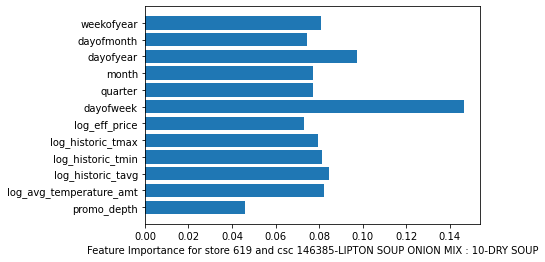

****
Processing store : 619 and csc : 146393
146393-S SEL BROTH CHICKN REDUCD SODIUM ASEPTIC 15-BOUILON BROTH
Length of train data :  797
Length of test data :  127
Best parameters: {'subsample': 0.7, 'n_estimators': 1000, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.4, 'colsample_bylevel': 0.7999999999999999}
Lowest RMSE:  0.6243254984151594
Test wmape :  28.20576991889109


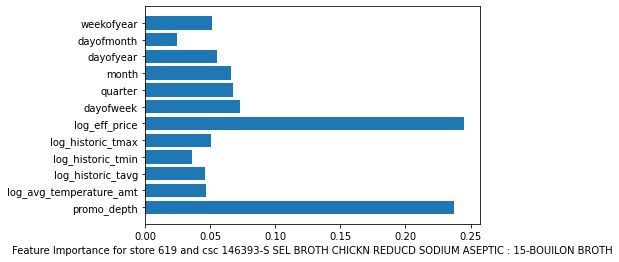

****
Processing store : 619 and csc : 146399
146399-S SEL BROTH CHICKEN ASEPTIC 15-BOUILON BROTH
Length of train data :  815
Length of test data :  174
Best parameters: {'subsample': 0.8999999999999999, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.6}
Lowest RMSE:  0.5998236192301176
Test wmape :  23.032641474469898


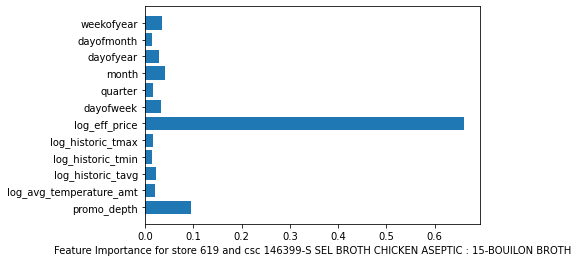

****
Processing store : 619 and csc : 146408
146408-PROGRESSO RTS SOUP CHICKEN NOODLE TRAD 20-READY TO SERVE SOUP
Length of train data :  733
Length of test data :  140
Best parameters: {'subsample': 0.5, 'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.5}
Lowest RMSE:  0.8801884831283489
Test wmape :  35.62324574108962


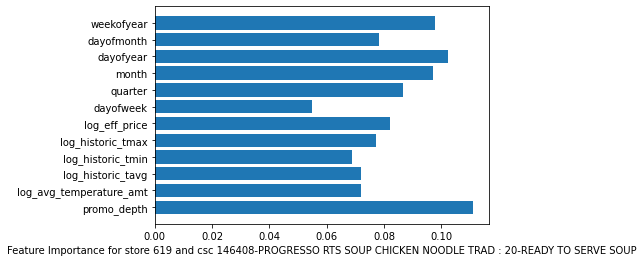

****
Processing store : 619 and csc : 146453
146453-PROGRESSO RCH & HRTY SOUP CHKN & NOODLE 20-READY TO SERVE SOUP
Length of train data :  684
Length of test data :  110
Best parameters: {'subsample': 0.7, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.4, 'colsample_bylevel': 0.7999999999999999}
Lowest RMSE:  0.8907989581677367
Test wmape :  34.1089535891138


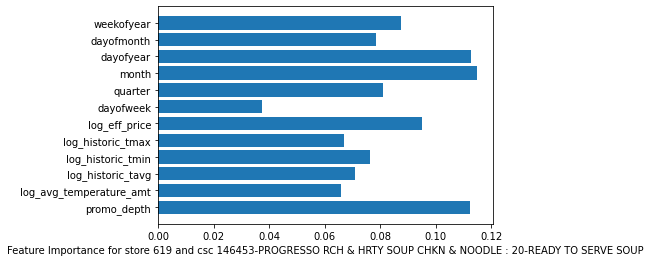

****
Processing store : 619 and csc : 146629
146629-CMPBL COND SOUP TOMATO 1-CONDENSED MULTI-SERVE EATING SOUP
Length of train data :  754
Length of test data :  157
Best parameters: {'subsample': 0.6, 'n_estimators': 10, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.7}
Lowest RMSE:  0.7584422490638607
Test wmape :  26.84723249900598


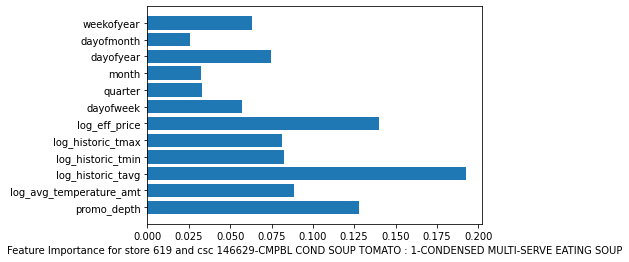

****
Processing store : 619 and csc : 146675
146675-CMPBL COND SOUP CHICKEN NOODLE 1-CONDENSED MULTI-SERVE EATING SOUP
Length of train data :  739
Length of test data :  144
Best parameters: {'subsample': 0.7999999999999999, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.4}
Lowest RMSE:  0.8401401962040316
Test wmape :  25.8618001221484


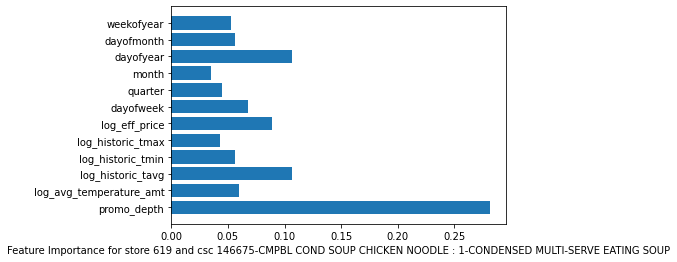

****
Processing store : 619 and csc : 146835
146835-COLLEGE INN CHICKEN BROTH 15-BOUILON BROTH
Length of train data :  758
Length of test data :  158
Best parameters: {'subsample': 0.7, 'n_estimators': 50, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.5}
Lowest RMSE:  0.6376977456363646
Test wmape :  30.432782643389306


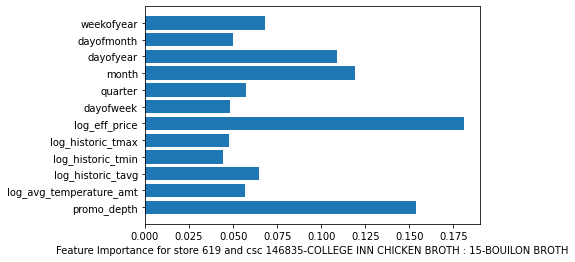

****
Processing store : 619 and csc : 322045
322045-GMILLS CINN TST CRNCH SWTND WHL WHT RICE 1-READY TO EAT CEREAL
Length of train data :  787
Length of test data :  151
Best parameters: {'subsample': 0.5, 'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.2, 'colsample_bytree': 0.4, 'colsample_bylevel': 0.7999999999999999}
Lowest RMSE:  0.7705821471426353
Test wmape :  27.55010410719782


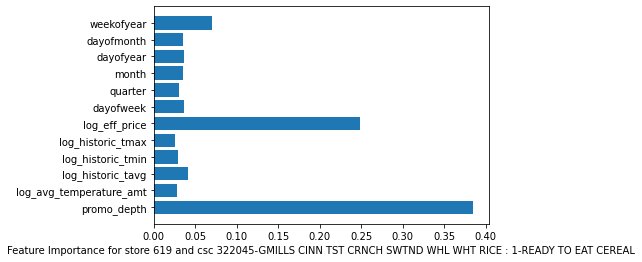

****
Processing store : 619 and csc : 322058
322058-GM CHEERIOS 1-READY TO EAT CEREAL
Length of train data :  816
Length of test data :  172
Best parameters: {'subsample': 0.7, 'n_estimators': 500, 'max_depth': 20, 'learning_rate': 0.01, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.4}
Lowest RMSE:  0.6850917789808512
Test wmape :  26.081725389177883


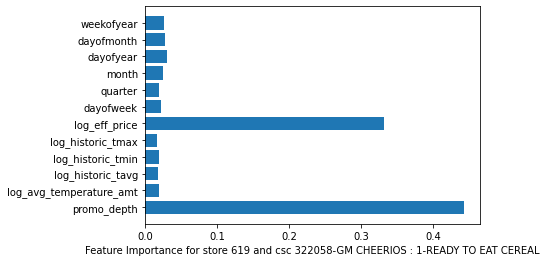

****
Processing store : 619 and csc : 322059
322059-GM CHEERIOS HONEY NUT 1-READY TO EAT CEREAL
Length of train data :  803
Length of test data :  169
Best parameters: {'subsample': 0.5, 'n_estimators': 500, 'max_depth': 20, 'learning_rate': 0.01, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.6}
Lowest RMSE:  0.7139510658023503
Test wmape :  24.04859000419704


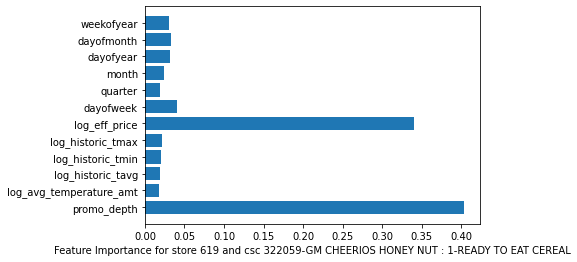

****
Processing store : 619 and csc : 322060
322060-GM CHEERIOS 1-READY TO EAT CEREAL
Length of train data :  770
Length of test data :  163
Best parameters: {'subsample': 0.7, 'n_estimators': 1000, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.5}
Lowest RMSE:  0.5090204772325331
Test wmape :  33.61995020511025


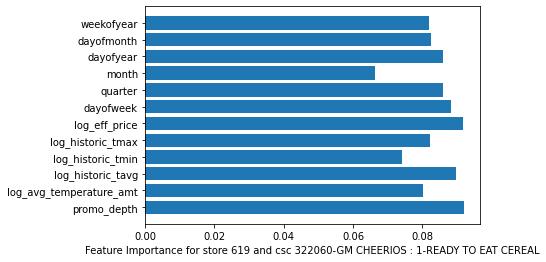

****
Processing store : 619 and csc : 322087
322087-GM CHEERIOS HONEY NUT 1-READY TO EAT CEREAL
Length of train data :  810
Length of test data :  172
Best parameters: {'subsample': 0.7999999999999999, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.4, 'colsample_bylevel': 0.8999999999999999}
Lowest RMSE:  0.5847008664213861
Test wmape :  18.453028139351773


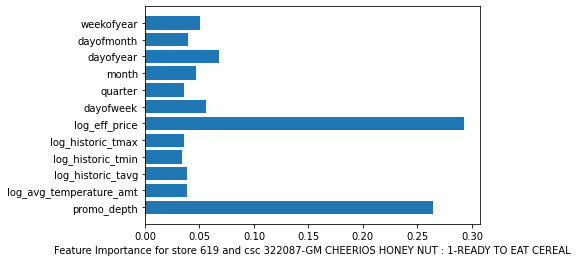

****
Processing store : 619 and csc : 322554
322554-KLLGGS MINI-WHEATS CRL BITE SZ FROSTED 1-READY TO EAT CEREAL
Length of train data :  784
Length of test data :  160
Best parameters: {'subsample': 0.5, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.6}
Lowest RMSE:  0.6228990686604827
Test wmape :  25.18839507794291


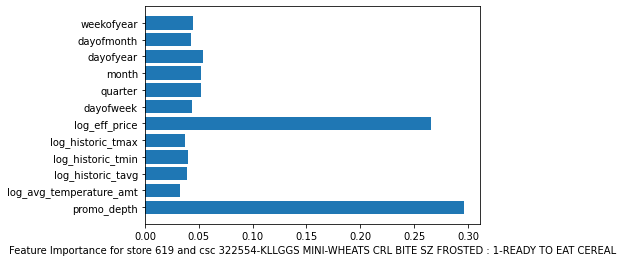

****
Processing store : 619 and csc : 146761
146761-SWNSN BROTH ASEPTIC CHICKEN 15-BOUILON BROTH
Length of train data :  700
Length of test data :  128
Best parameters: {'subsample': 0.6, 'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.7999999999999999, 'colsample_bylevel': 0.6}
Lowest RMSE:  0.5614572200871706
Test wmape :  25.53135722251382


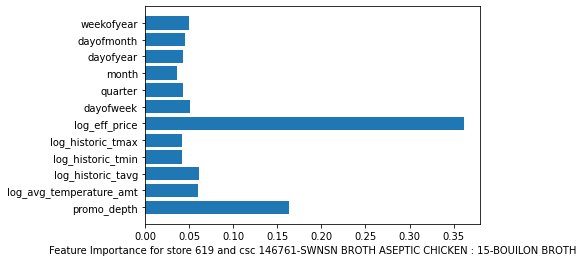

****
Processing store : 619 and csc : 322082
322082-GM CHEERIOS 1-READY TO EAT CEREAL
Length of train data :  797
Length of test data :  173
Best parameters: {'subsample': 0.6, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.7999999999999999, 'colsample_bylevel': 0.7999999999999999}
Lowest RMSE:  0.5564735206802595
Test wmape :  19.42203094232917


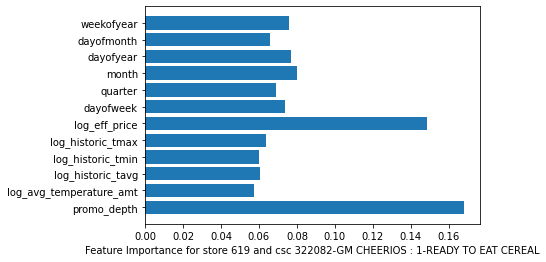

****
Processing store : 619 and csc : 322625
322625-KLLGGS SPCL K CEREAL RED BERRIES 1-READY TO EAT CEREAL
Length of train data :  746
Length of test data :  163
Best parameters: {'subsample': 0.5, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.7999999999999999, 'colsample_bylevel': 0.6}
Lowest RMSE:  0.6346678931447117
Test wmape :  36.11198906901


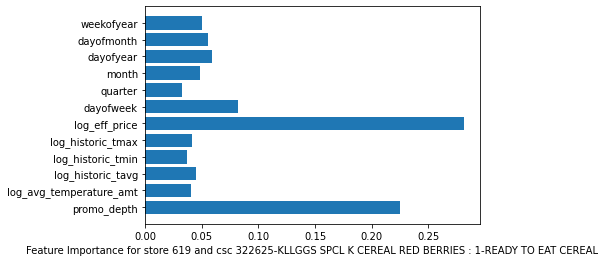

****
Processing store : 619 and csc : 460913
460913-GM CHEERIOS HONEY NUT 1-READY TO EAT CEREAL
Length of train data :  761
Length of test data :  153
Best parameters: {'subsample': 0.8999999999999999, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.4}
Lowest RMSE:  0.5285278309216483
Test wmape :  32.526305557683685


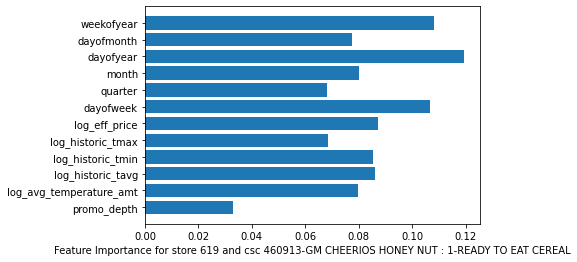

****
Processing store : 619 and csc : 322557
322557-KLLGG FROSTED FLAKES BONUS PACK 1-READY TO EAT CEREAL
Length of train data :  807
Length of test data :  191
Best parameters: {'subsample': 0.7, 'n_estimators': 50, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.5}
Lowest RMSE:  0.6961227319285959
Test wmape :  25.334555746855763


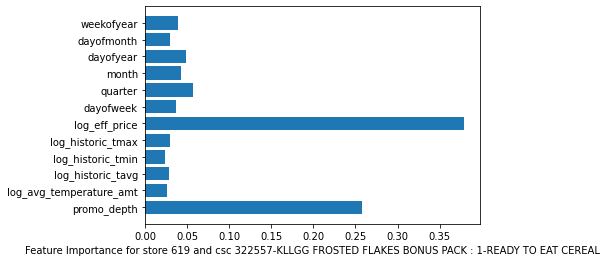

****
Processing store : 619 and csc : 413364
413364-O ORGNC BROTH CHICKEN LOW SODIUM ASEPTIC 15-BOUILON BROTH
Length of train data :  580
Length of test data :  146
Best parameters: {'subsample': 0.8999999999999999, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.6}
Lowest RMSE:  0.6173300152407265
Test wmape :  27.729646931088443


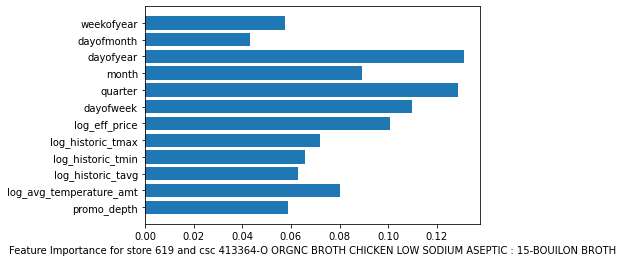

****
Processing store : 326 and csc : 147065
147065-O ORGNC BROTH CHICKEN ASEPTIC 15-BOUILON BROTH
Length of train data :  389
Length of test data :  93
Best parameters: {'subsample': 0.8999999999999999, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.7999999999999999}
Lowest RMSE:  0.4518310698902121
Test wmape :  28.856759188579723


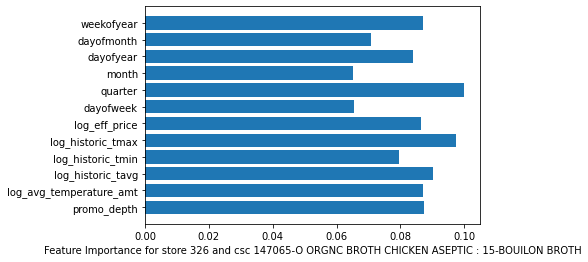

****
Processing store : 326 and csc : 322059
322059-GM CHEERIOS HONEY NUT 1-READY TO EAT CEREAL
Length of train data :  601
Length of test data :  130
Best parameters: {'subsample': 0.7999999999999999, 'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.6}
Lowest RMSE:  0.5229726470704722
Test wmape :  30.87850907234649


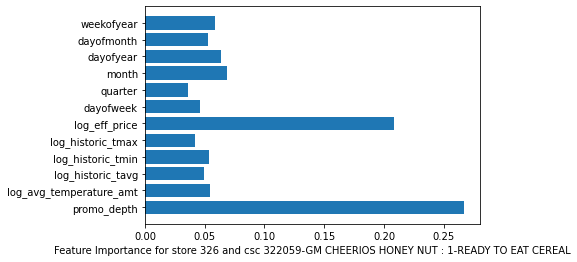

****
Processing store : 326 and csc : 322060
322060-GM CHEERIOS 1-READY TO EAT CEREAL
Length of train data :  582
Length of test data :  101
Best parameters: {'subsample': 0.7999999999999999, 'n_estimators': 10, 'max_depth': 5, 'learning_rate': 0.2, 'colsample_bytree': 0.8999999999999999, 'colsample_bylevel': 0.7999999999999999}
Lowest RMSE:  0.3665925965705852
Test wmape :  28.877121433102136


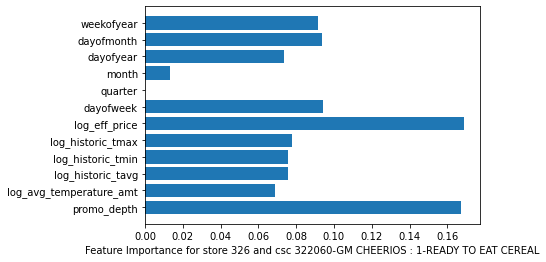

****
Processing store : 326 and csc : 322082
322082-GM CHEERIOS 1-READY TO EAT CEREAL
Length of train data :  531
Length of test data :  102
Best parameters: {'subsample': 0.7, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.4, 'colsample_bylevel': 0.8999999999999999}
Lowest RMSE:  0.4073241605741416
Test wmape :  33.49786463387834


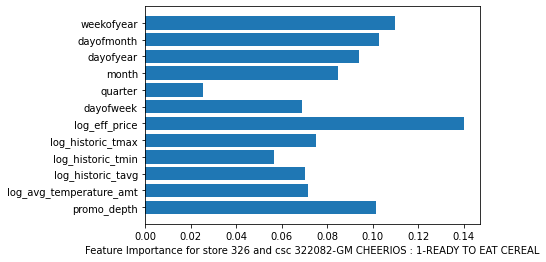

****
Processing store : 326 and csc : 322390
322390-QUAKER SIMPLY GRANOLA OATS HONEY RAISINS 1-READY TO EAT CEREAL
Length of train data :  405
Length of test data :  50
Best parameters: {'subsample': 0.7999999999999999, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.8999999999999999, 'colsample_bylevel': 0.5}
Lowest RMSE:  0.28669302156058385
Test wmape :  26.805609859642992


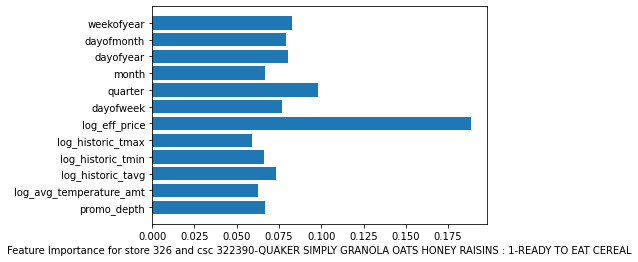

****
Processing store : 326 and csc : 410691
410691-MARUCHAN RAMEN SOUP CHICKEN 10-DRY SOUP
Length of train data :  550
Length of test data :  163
Best parameters: {'subsample': 0.5, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.4, 'colsample_bylevel': 0.4}
Lowest RMSE:  0.6963741738434763
Test wmape :  25.67382278790737


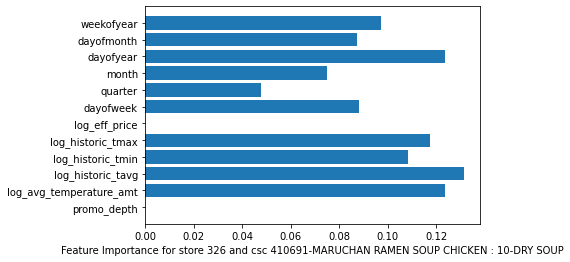

****
Processing store : 326 and csc : 460651
460651-QUAKER CEREAL LIFE 1-READY TO EAT CEREAL
Length of train data :  472
Length of test data :  114
Best parameters: {'subsample': 0.8999999999999999, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.8999999999999999, 'colsample_bylevel': 0.8999999999999999}
Lowest RMSE:  0.33203285894139445
Test wmape :  28.94657353366375


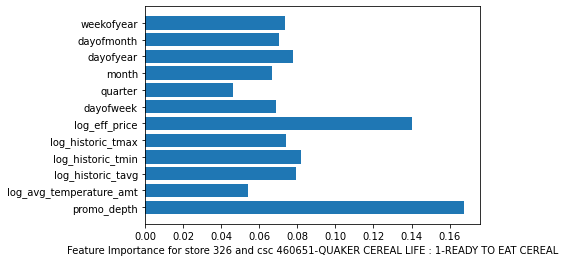

****
Processing store : 326 and csc : 460913
460913-GM CHEERIOS HONEY NUT 1-READY TO EAT CEREAL
Length of train data :  691
Length of test data :  107
Best parameters: {'subsample': 0.5, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.7999999999999999, 'colsample_bylevel': 0.4}
Lowest RMSE:  0.44675541035016975
Test wmape :  31.46330817163839


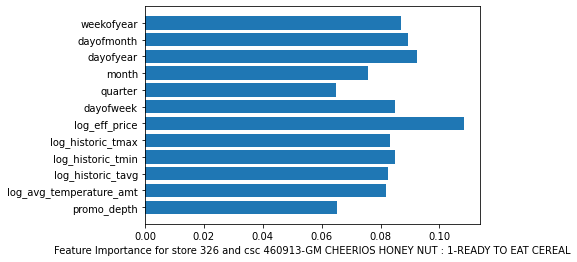

****
Processing store : 326 and csc : 466564
466564-S SEL STOCK VEGETABLE 15-BOUILON BROTH
Length of train data :  499
Length of test data :  77
Best parameters: {'subsample': 0.8999999999999999, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.6}
Lowest RMSE:  0.45108372948665376
Test wmape :  32.17893228864181


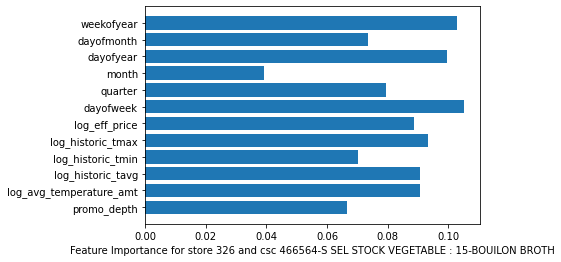

****
Processing store : 326 and csc : 778229
778229-COLLEGE INN CHICKEN BOLD STOCK 15-BOUILON BROTH
Length of train data :  402
Length of test data :  30
Best parameters: {'subsample': 0.7999999999999999, 'n_estimators': 10, 'max_depth': 5, 'learning_rate': 0.3, 'colsample_bytree': 0.7999999999999999, 'colsample_bylevel': 0.6}
Lowest RMSE:  0.43004510963792203
Test wmape :  28.09637852359671


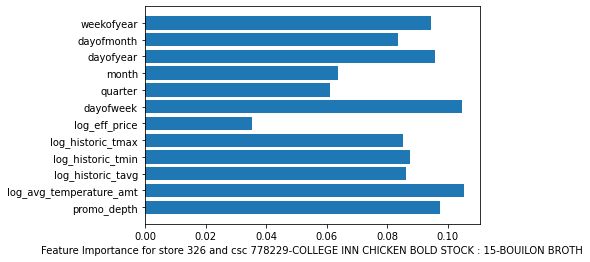

****
Processing store : 326 and csc : 146629
146629-CMPBL COND SOUP TOMATO 1-CONDENSED MULTI-SERVE EATING SOUP
Length of train data :  535
Length of test data :  101
Best parameters: {'subsample': 0.7999999999999999, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.4}
Lowest RMSE:  0.562344295020697
Test wmape :  27.511213663641016


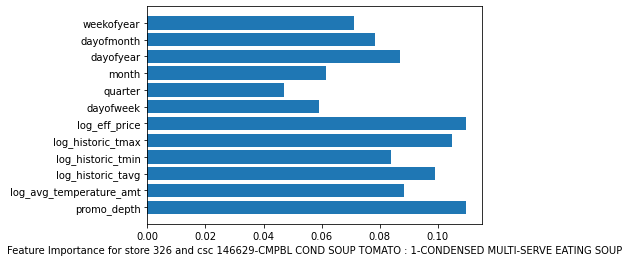

****
Processing store : 326 and csc : 322087
322087-GM CHEERIOS HONEY NUT 1-READY TO EAT CEREAL
Length of train data :  523
Length of test data :  133
Best parameters: {'subsample': 0.5, 'n_estimators': 10, 'max_depth': 5, 'learning_rate': 0.2, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.7}
Lowest RMSE:  0.38939457291955826
Test wmape :  32.3958872569768


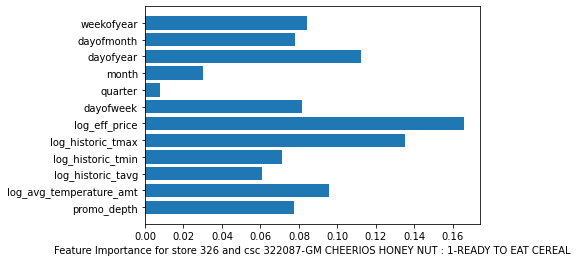

****
Processing store : 326 and csc : 322389
322389-QUAKER SIMPLY GRANOLA OATS HONEY ALMONDS 1-READY TO EAT CEREAL
Length of train data :  448
Length of test data :  105
Best parameters: {'subsample': 0.7999999999999999, 'n_estimators': 500, 'max_depth': 6, 'learning_rate': 0.01, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.6}
Lowest RMSE:  0.3386320210460309
Test wmape :  31.77178733054828


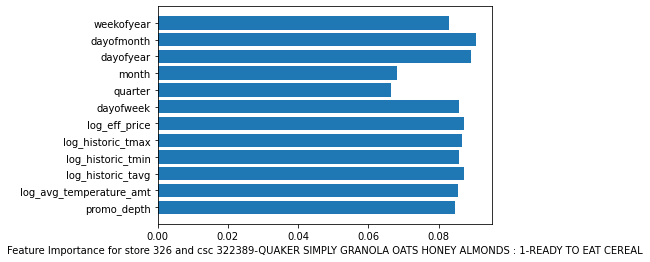

****
Processing store : 326 and csc : 322455
322455-KLLGGS RAISIN BRAN CEREAL 1-READY TO EAT CEREAL
Length of train data :  476
Length of test data :  72
Best parameters: {'subsample': 0.7999999999999999, 'n_estimators': 10, 'max_depth': 3, 'learning_rate': 0.3, 'colsample_bytree': 0.7999999999999999, 'colsample_bylevel': 0.6}
Lowest RMSE:  0.3591874696599649
Test wmape :  27.771800716683636


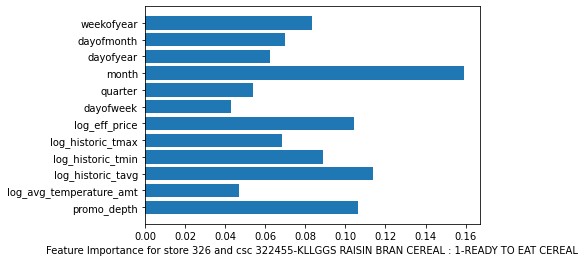

****
Processing store : 326 and csc : 146399
146399-S SEL BROTH CHICKEN ASEPTIC 15-BOUILON BROTH
Length of train data :  472
Length of test data :  73
Best parameters: {'subsample': 0.6, 'n_estimators': 1000, 'max_depth': 15, 'learning_rate': 0.01, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.5}
Lowest RMSE:  0.4520310737704083
Test wmape :  27.710792420898095


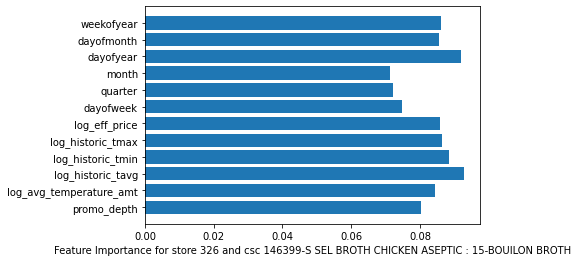

****
Processing store : 326 and csc : 146408
146408-PROGRESSO RTS SOUP CHICKEN NOODLE TRAD 20-READY TO SERVE SOUP
Length of train data :  391
Length of test data :  56
Best parameters: {'subsample': 0.7, 'n_estimators': 500, 'max_depth': 6, 'learning_rate': 0.01, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.6}
Lowest RMSE:  0.49612407590221064
Test wmape :  29.288483448665996


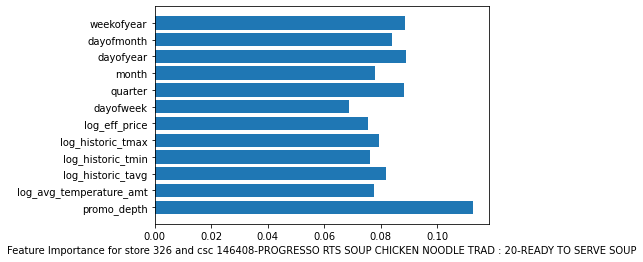

****
Processing store : 326 and csc : 146761
146761-SWNSN BROTH ASEPTIC CHICKEN 15-BOUILON BROTH
Length of train data :  346
Length of test data :  61
Best parameters: {'subsample': 0.7999999999999999, 'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.5}
Lowest RMSE:  0.4139015681090098
Test wmape :  28.304665042717204


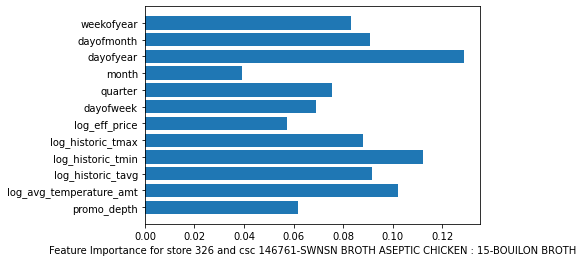

****
Processing store : 326 and csc : 146835
146835-COLLEGE INN CHICKEN BROTH 15-BOUILON BROTH
Length of train data :  412
Length of test data :  39
Best parameters: {'subsample': 0.5, 'n_estimators': 10, 'max_depth': 3, 'learning_rate': 0.3, 'colsample_bytree': 0.7999999999999999, 'colsample_bylevel': 0.7999999999999999}
Lowest RMSE:  0.4638039384244752
Test wmape :  27.04199852806084


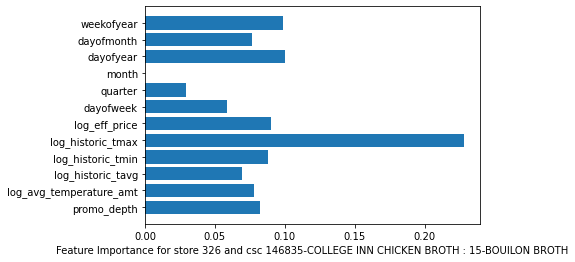

****
Processing store : 326 and csc : 322325
322325-QUAKER OATMEAL HOT CEREAL OLD FASHIONED 5-HOT CEREAL
Length of train data :  529
Length of test data :  97
Best parameters: {'subsample': 0.8999999999999999, 'n_estimators': 10, 'max_depth': 20, 'learning_rate': 0.2, 'colsample_bytree': 0.4, 'colsample_bylevel': 0.4}
Lowest RMSE:  0.3736610842399066
Test wmape :  18.333081502804646


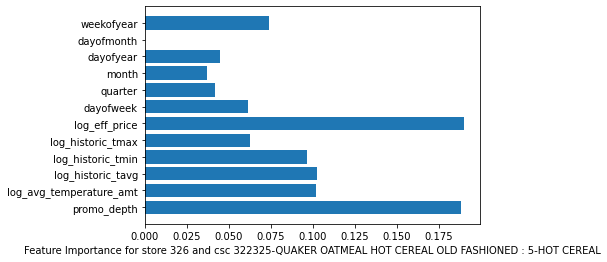

****
Processing store : 326 and csc : 461103
461103-PACIFIC BROTH CKN LS ORGNC 15-BOUILON BROTH
Length of train data :  209
Length of test data :  32
Best parameters: {'subsample': 0.8999999999999999, 'n_estimators': 1000, 'max_depth': 15, 'learning_rate': 0.01, 'colsample_bytree': 0.4, 'colsample_bylevel': 0.5}
Lowest RMSE:  0.397537500519739
Test wmape :  26.917969762674588


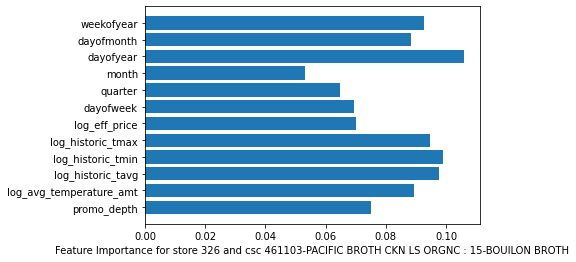

****


In [100]:
#val_wmape_list = []
test_wmape_list = []
feature_importance_list = []
#df_val_actual_vs_predicted = pd.DataFrame()
df_test_actual_vs_predicted = pd.DataFrame()

for e in unique_str_csc_list:

    store, csc = e[0], e[1]
    print(f"Processing store : {store} and csc : {csc}")

    csc_desc          = df_upc[df_upc['consumer_selling_cd'] == csc]['item_dsc'].values[0]
    smic_group_dsc    = df_upc[df_upc['consumer_selling_cd'] == csc]['smic_group_dsc'].values[0]
    smic_group_cd     = df_upc[df_upc['consumer_selling_cd'] == csc]['smic_group_cd'].values[0]
    smic_category_dsc = df_upc[df_upc['consumer_selling_cd'] == csc]['smic_category_dsc'].values[0]
    smic_category_cd = df_upc[df_upc['consumer_selling_cd'] == csc]['smic_category_cd'].values[0]
    smic_grp_info    = str(smic_group_cd) + '-' + smic_group_dsc
    smic_ctg_info    = str(smic_category_cd) + '-' + smic_category_dsc
    csc_info         = str(csc) + '-' + csc_desc
    print(csc_info, smic_ctg_info)

    print("Length of train data : ", len(df_train[(df_train.store_id == store) & (df_train.consumer_selling_cd == csc)]))
    print("Length of test data : ", len(df_test[(df_test.store_id == store) & (df_test.consumer_selling_cd == csc)]))
    #print("Length of val data : ", len(df_val[(df_val.store_id == store) & (df_val.consumer_selling_cd == csc)]))
    
    df_train_modified = df_train[(df_train.store_id == store) & (df_train.consumer_selling_cd == csc)]
    df_test_modified = df_test[(df_test.store_id == store) & (df_test.consumer_selling_cd == csc)]
    #df_val_modified = df_val[(df_val.store_id == store) & (df_val.consumer_selling_cd == csc)]

    train_indices = df_train_modified.index
    test_indices = df_test_modified.index
    #val_indices = df_val_modified.index

    X_train = df_train_modified[x_cols].values
    y_train = df_train_modified[y_col].values

    #X_val = df_val_modified[x_cols].values
    #y_val = df_val_modified[y_col].values

    X_test = df_test_modified[x_cols].values
    y_test = df_test_modified[y_col].values

    ### XGBoost ###
    #xgboost_reg_1 = xgboost.XGBRegressor(n_estimators=100, max_depth = 5)# for val
    xgboost_reg_2 = xgboost.XGBRegressor(seed=20, verbosity = 0)# for test
    '''
    xgboost_reg_1.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_val, y_val)],
        early_stopping_rounds=50,
        verbose=False) 
    
    xgboost_reg_2.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
        verbose=False) 
    dmatrix = xgboost_reg_2.DMatrix(data=X_train, label=y_train)
    #params={'objective':'reg:squarederror'}
    '''
    params = { 'max_depth': [3, 5, 6, 10, 15, 20],
               'learning_rate': [.001, 0.01, 0.1, 0.2, 0.3],
               'subsample': np.arange(0.5, 1.0, 0.1),
               'colsample_bytree': np.arange(0.4, 1.0, 0.1),
               'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
               'n_estimators': [10, 50, 100, 500, 1000]
             }
    clf = RandomizedSearchCV(estimator=xgboost_reg_2,
                             param_distributions=params,
                             scoring='neg_mean_squared_error',
                             n_iter=25,
                             verbose=0)
    clf.fit(X_train, y_train)
    print("Best parameters:", clf.best_params_)
    print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))
    
    '''
    print("Feature importance for validation set of ", e)
    _ = plot_importance(xgboost_reg_1, height=0.9)
    print("Feature importance for test set of ", e)
    _ = plot_importance(xgboost_reg_2, height=0.9)
    y_val_predicted = xgboost_reg_1.predict(X_val)
    '''

    y_test_predicted = clf.predict(X_test)

    '''
    y_val_combined = pd.DataFrame(y_val, y_val_predicted).reset_index()
    y_val_combined.columns = ['y_val_actual', 'y_val_predicted']
    y_val_combined['store_id'] = store
    y_val_combined['csc'] = csc
    y_val_combined.index = val_indices
    val_wmape = weighted_mape(y_val_combined['y_val_actual'], y_val_combined['y_val_predicted']).numpy()
    print("Validation wmape :", val_wmape)
    print(y_val_combined)
    y_val_combined.to_csv('val_pred_' + "{}".format(store) + '_' + "{}".format(csc) + '.csv')
    val_wmape_list.append((store, csc, val_wmape))
    df_val_actual_vs_predicted = pd.concat([y_val_combined, df_val_actual_vs_predicted])
    '''
    y_test_combined = pd.DataFrame()
    y_test_combined = pd.DataFrame(y_test_predicted, y_test.ravel()).reset_index()
    y_test_combined.columns = ['y_test_actual', 'y_test_predicted']
    y_test_combined['store_id'] = store
    y_test_combined['csc'] = csc
    y_test_combined.index = test_indices

    #test_wmape = weighted_mape(y_test_combined['y_test_actual'], y_test_combined['y_test_predicted']).numpy()
    #print("Test wmape : ", test_wmape)
    
    store_csc_list = [store, csc, csc_info, smic_ctg_info]
    feature_importance_list.append(store_csc_list + list(clf.best_estimator_.feature_importances_))
    plt.barh(x_cols, clf.best_estimator_.feature_importances_)
    plt.xlabel("Feature Importance for store " + str(store) + " and csc " + csc_info + ' : ' + smic_ctg_info)
    plt.show(block = False)

    '''
    print(y_test)
    print("%%%%")
    print(y_test_predicted)
    print("*******************************")
    print(y_test_combined)
    y_test_combined.to_csv('test_pred_' + "{}".format(store) + '_' + "{}".format(csc) + '.csv')
    '''
    #test_wmape_list.append((store, csc_info + ' : ' + smic_ctg_info, test_wmape))
    
    df_test_actual_vs_predicted = pd.concat([df_test_actual_vs_predicted, y_test_combined])
    print("****")
    #print(df_test_actual_vs_predicted)
    #print("^^^^^^^^^")
    

In [101]:
df_feature_importance = pd.DataFrame(feature_importance_list)
df_feature_importance.columns = ['store_id', 'csc', 'csc_info', 'smic_ctg_info'] + [col + '_feature_importance' for col in x_cols]
df_feature_importance

store_id     csc                                         csc_info  \
0        619  146385                     146385-LIPTON SOUP ONION MIX   
1        619  146393  146393-S SEL BROTH CHICKN REDUCD SODIUM ASEPTIC   
2        619  146399               146399-S SEL BROTH CHICKEN ASEPTIC   
3        619  146408    146408-PROGRESSO RTS SOUP CHICKEN NOODLE TRAD   
4        619  146453   146453-PROGRESSO RCH & HRTY SOUP CHKN & NOODLE   
5        619  146629                    146629-CMPBL COND SOUP TOMATO   
6        619  146675            146675-CMPBL COND SOUP CHICKEN NOODLE   
7        619  146835                 146835-COLLEGE INN CHICKEN BROTH   
8        619  322045  322045-GMILLS CINN TST CRNCH SWTND WHL WHT RICE   
9        619  322058                               322058-GM CHEERIOS   
10       619  322059                     322059-GM CHEERIOS HONEY NUT   
11       619  322060                               322060-GM CHEERIOS   
12       619  322087                     322087-GM CHEERIOS HONEY NUT   
13       619  322554    322554-KLLGGS MINI-WHEATS CRL BITE SZ FROSTED   
14       619  146761               146761-SWNSN BROTH ASEPTIC CHICKEN   
15       619  322082                               322082-GM CHEERIOS   
16       619  322625          322625-KLLGGS SPCL K CEREAL RED BERRIES   
17       619  460913                     460913-GM CHEERIOS HONEY NUT   
18       619  322557           322557-KLLGG FROSTED FLAKES BONUS PACK   
19       619  413364  413364-O ORGNC BROTH CHICKEN LOW SODIUM ASEPTIC   
20       326  147065             147065-O ORGNC BROTH CHICKEN ASEPTIC   
21       326  322059                     322059-GM CHEERIOS HONEY NUT   
22       326  322060                               322060-GM CHEERIOS   
23       326  322082                               322082-GM CHEERIOS   
24       326  322390  322390-QUAKER SIMPLY GRANOLA OATS HONEY RAISINS   
25       326  410691               410691-MARUCHAN RAMEN SOUP CHICKEN   
26       326  460651                        460651-QUAKER CEREAL LIFE   
27       326  460913                     460913-GM CHEERIOS HONEY NUT   
28       326  466564                     466564-S SEL STOCK VEGETABLE   
29       326  778229            778229-COLLEGE INN CHICKEN BOLD STOCK   
30       326  146629                    146629-CMPBL COND SOUP TOMATO   
31       326  322087                     322087-GM CHEERIOS HONEY NUT   
32       326  322389  322389-QUAKER SIMPLY GRANOLA OATS HONEY ALMONDS   
33       326  322455                 322455-KLLGGS RAISIN BRAN CEREAL   
34       326  146399               146399-S SEL BROTH CHICKEN ASEPTIC   
35       326  146408    146408-PROGRESSO RTS SOUP CHICKEN NOODLE TRAD   
36       326  146761               146761-SWNSN BROTH ASEPTIC CHICKEN   
37       326  146835                 146835-COLLEGE INN CHICKEN BROTH   
38       326  322325   322325-QUAKER OATMEAL HOT CEREAL OLD FASHIONED   
39       326  461103                461103-PACIFIC BROTH CKN LS ORGNC   

                          smic_ctg_info  promo_depth_feature_importance  \
0                           10-DRY SOUP                      0.04595108   
1                      15-BOUILON BROTH                      0.23701553   
2                      15-BOUILON BROTH                      0.09495182   
3                20-READY TO SERVE SOUP                      0.11118994   
4                20-READY TO SERVE SOUP                      0.11250748   
5   1-CONDENSED MULTI-SERVE EATING SOUP                      0.12817685   
6   1-CONDENSED MULTI-SERVE EATING SOUP                      0.28181431   
7                      15-BOUILON BROTH                      0.15350217   
8                 1-READY TO EAT CEREAL                      0.38439792   
9                 1-READY TO EAT CEREAL                      0.44211319   
10                1-READY TO EAT CEREAL                      0.40333545   
11                1-READY TO EAT CEREAL                      0.09192911   
12                1-READY TO EAT CE

In [102]:
df_feature_importance.sort_values(by = ['log_historic_tavg_feature_importance'], ascending = False)

store_id     csc                                         csc_info  \
5        619  146629                    146629-CMPBL COND SOUP TOMATO   
25       326  410691               410691-MARUCHAN RAMEN SOUP CHICKEN   
33       326  322455                 322455-KLLGGS RAISIN BRAN CEREAL   
6        619  146675            146675-CMPBL COND SOUP CHICKEN NOODLE   
38       326  322325   322325-QUAKER OATMEAL HOT CEREAL OLD FASHIONED   
30       326  146629                    146629-CMPBL COND SOUP TOMATO   
39       326  461103                461103-PACIFIC BROTH CKN LS ORGNC   
34       326  146399               146399-S SEL BROTH CHICKEN ASEPTIC   
36       326  146761               146761-SWNSN BROTH ASEPTIC CHICKEN   
28       326  466564                     466564-S SEL STOCK VEGETABLE   
20       326  147065             147065-O ORGNC BROTH CHICKEN ASEPTIC   
11       619  322060                               322060-GM CHEERIOS   
32       326  322389  322389-QUAKER SIMPLY GRANOLA OATS HONEY ALMONDS   
17       619  460913                     460913-GM CHEERIOS HONEY NUT   
29       326  778229            778229-COLLEGE INN CHICKEN BOLD STOCK   
0        619  146385                     146385-LIPTON SOUP ONION MIX   
27       326  460913                     460913-GM CHEERIOS HONEY NUT   
35       326  146408    146408-PROGRESSO RTS SOUP CHICKEN NOODLE TRAD   
26       326  460651                        460651-QUAKER CEREAL LIFE   
22       326  322060                               322060-GM CHEERIOS   
24       326  322390  322390-QUAKER SIMPLY GRANOLA OATS HONEY RAISINS   
3        619  146408    146408-PROGRESSO RTS SOUP CHICKEN NOODLE TRAD   
4        619  146453   146453-PROGRESSO RCH & HRTY SOUP CHKN & NOODLE   
23       326  322082                               322082-GM CHEERIOS   
37       326  146835                 146835-COLLEGE INN CHICKEN BROTH   
7        619  146835                 146835-COLLEGE INN CHICKEN BROTH   
19       619  413364  413364-O ORGNC BROTH CHICKEN LOW SODIUM ASEPTIC   
14       619  146761               146761-SWNSN BROTH ASEPTIC CHICKEN   
31       326  322087                     322087-GM CHEERIOS HONEY NUT   
15       619  322082                               322082-GM CHEERIOS   
21       326  322059                     322059-GM CHEERIOS HONEY NUT   
1        619  146393  146393-S SEL BROTH CHICKN REDUCD SODIUM ASEPTIC   
16       619  322625          322625-KLLGGS SPCL K CEREAL RED BERRIES   
8        619  322045  322045-GMILLS CINN TST CRNCH SWTND WHL WHT RICE   
13       619  322554    322554-KLLGGS MINI-WHEATS CRL BITE SZ FROSTED   
12       619  322087                     322087-GM CHEERIOS HONEY NUT   
18       619  322557           322557-KLLGG FROSTED FLAKES BONUS PACK   
2        619  146399               146399-S SEL BROTH CHICKEN ASEPTIC   
10       619  322059                     322059-GM CHEERIOS HONEY NUT   
9        619  322058                               322058-GM CHEERIOS   

                          smic_ctg_info  promo_depth_feature_importance  \
5   1-CONDENSED MULTI-SERVE EATING SOUP                      0.12817685   
25                          10-DRY SOUP                      0.00000000   
33                1-READY TO EAT CEREAL                      0.10630073   
6   1-CONDENSED MULTI-SERVE EATING SOUP                      0.28181431   
38                         5-HOT CEREAL                      0.18809973   
30  1-CONDENSED MULTI-SERVE EATING SOUP                      0.10985474   
39                     15-BOUILON BROTH                      0.07501620   
34                     15-BOUILON BROTH                      0.08041852   
36                     15-BOUILON BROTH                      0.06191579   
28                     15-BOUILON BROTH                      0.06664504   
20                     15-BOUILON BROTH                      0.08738762   
11                1-READY TO EAT CEREAL                      0.09192911   
32                1-READY TO EAT CE

In [103]:
df_feature_importance[(df_feature_importance.store_id == 619) & (df_feature_importance.csc == 322045)].iloc[0]

store_id                                                                                  619
csc                                                                                    322045
csc_info                                      322045-GMILLS CINN TST CRNCH SWTND WHL WHT RICE
smic_ctg_info                                                           1-READY TO EAT CEREAL
promo_depth_feature_importance                                                     0.38439792
log_avg_temperature_amt_feature_importance                                         0.02781338
log_historic_tavg_feature_importance                                               0.04122781
log_historic_tmin_feature_importance                                               0.02925881
log_historic_tmax_feature_importance                                                0.0251799
log_eff_price_feature_importance                                                    0.2490851
dayofweek_feature_importance                                

In [104]:
df_feature_importance[(df_feature_importance.store_id == 619) & (df_feature_importance.csc == 322087)].iloc[0]

store_id                                                               619
csc                                                                 322087
csc_info                                      322087-GM CHEERIOS HONEY NUT
smic_ctg_info                                        1-READY TO EAT CEREAL
promo_depth_feature_importance                                  0.26416513
log_avg_temperature_amt_feature_importance                      0.03857765
log_historic_tavg_feature_importance                            0.03870264
log_historic_tmin_feature_importance                            0.03415587
log_historic_tmax_feature_importance                            0.03544588
log_eff_price_feature_importance                                0.29255277
dayofweek_feature_importance                                    0.05631093
quarter_feature_importance                                      0.03598583
month_feature_importance                                        0.04688667
dayofyear_feature_importa

In [105]:
df_txn[df_txn.consumer_selling_cd == 461103]['smic_group_cd'].drop_duplicates()

14359    25
Name: smic_group_cd, dtype: int64

In [106]:
df_txn[df_txn.consumer_selling_cd == 322455]['smic_group_cd'].drop_duplicates()

61    11
Name: smic_group_cd, dtype: int64

In [107]:
df_test_actual_vs_predicted

y_test_actual  y_test_predicted  store_id     csc
day_dt                                                       
2022-05-01     2.63905733        1.91630721       619  146385
2022-05-02     1.60943791        1.84384358       619  146385
2022-05-03     2.19722458        1.69659817       619  146385
2022-05-04     2.30258509        1.77739477       619  146385
2022-05-05     1.60943791        1.79696274       619  146385
...                   ...               ...       ...     ...
2022-08-11     1.09861229        1.03967488       326  461103
2022-08-14     0.69314718        0.92647225       326  461103
2022-08-17     1.38629436        0.81186193       326  461103
2022-08-19     0.69314718        0.88198858       326  461103
2022-08-20     1.38629436        0.89766777       326  461103

[4858 rows x 4 columns]

In [108]:
df_test_actual_vs_predicted['y_test_actual_transformed'] = df_test_actual_vs_predicted['y_test_actual'].apply(lambda x : np.round(np.exp(x) - 1))
df_test_actual_vs_predicted['y_test_predicted_transformed'] = df_test_actual_vs_predicted['y_test_predicted'].apply(lambda x : np.round(np.exp(x) - 1))
df_test_actual_vs_predicted

y_test_actual  y_test_predicted  store_id     csc  \
day_dt                                                          
2022-05-01     2.63905733        1.91630721       619  146385   
2022-05-02     1.60943791        1.84384358       619  146385   
2022-05-03     2.19722458        1.69659817       619  146385   
2022-05-04     2.30258509        1.77739477       619  146385   
2022-05-05     1.60943791        1.79696274       619  146385   
...                   ...               ...       ...     ...   
2022-08-11     1.09861229        1.03967488       326  461103   
2022-08-14     0.69314718        0.92647225       326  461103   
2022-08-17     1.38629436        0.81186193       326  461103   
2022-08-19     0.69314718        0.88198858       326  461103   
2022-08-20     1.38629436        0.89766777       326  461103   

            y_test_actual_transformed  y_test_predicted_transformed  
day_dt                                                               
2022-05-01                       13.0                           6.0  
2022-05-02                        4.0                           5.0  
2022-05-03                        8.0                           4.0  
2022-05-04                        9.0                           5.0  
2022-05-05                        4.0                           5.0  
...                               ...                           ...  
2022-08-11                        2.0                           2.0  
2022-08-14                        1.0                           2.0  
2022-08-17                        3.0                           1.0  
2022-08-19                        1.0                           1.0  
2022-08-20                        3.0                           1.0  

[4858 rows x 6 columns]

In [119]:
wmape_list = df_test_actual_vs_predicted.groupby(['store_id','csc']).apply(lambda x: weighted_mape(x['y_test_actual_transformed'], x['y_test_predicted_transformed']))

In [131]:
wmape_list = np.asarray(wmape_list)
wmape_list = [e.numpy() for e in wmape_list]
wmape_list

[41.40625,
 48.214285714285715,
 41.69741697416974,
 46.36363636363636,
 37.93103448275862,
 44.505494505494504,
 51.03092783505154,
 45.0,
 53.2258064516129,
 49.834983498349835,
 24.8,
 52.0,
 36.76470588235294,
 40.56603773584906,
 51.60493827160494,
 41.05263157894737,
 48.484848484848484,
 44.230769230769226,
 50.75757575757576,
 42.5,
 43.88059701492537,
 52.016129032258064,
 46.85466377440347,
 60.477001703577514,
 61.74496644295302,
 51.128557409224726,
 49.276672694394215,
 45.83333333333333,
 51.546391752577314,
 64.18300653594771,
 58.46036585365854,
 60.782241014799155,
 57.78491171749599,
 38.445378151260506,
 39.83286908077994,
 54.2756183745583,
 50.87644292432664,
 83.56435643564356,
 50.23255813953489,
 59.24657534246576]

In [140]:
df_kpi = df_test_actual_vs_predicted[['store_id', 'csc']].drop_duplicates().reset_index().iloc[:,1:]
df_kpi['wmape'] = wmape_list
df_kpi['accuracy'] = 100 - df_kpi['wmape']
df_kpi.sort_values(by=['accuracy'], ascending = False)

store_id     csc        wmape     accuracy
10       619  322059  24.80000000  75.20000000
12       619  322087  36.76470588  63.23529412
4        619  146453  37.93103448  62.06896552
33       326  322455  38.44537815  61.55462185
34       326  146399  39.83286908  60.16713092
13       619  322554  40.56603774  59.43396226
15       619  322082  41.05263158  58.94736842
0        619  146385  41.40625000  58.59375000
2        619  146399  41.69741697  58.30258303
19       619  413364  42.50000000  57.50000000
20       326  147065  43.88059701  56.11940299
17       619  460913  44.23076923  55.76923077
5        619  146629  44.50549451  55.49450549
7        619  146835  45.00000000  55.00000000
27       326  460913  45.83333333  54.16666667
3        619  146408  46.36363636  53.63636364
22       326  322060  46.85466377  53.14533623
1        619  146393  48.21428571  51.78571429
16       619  322625  48.48484848  51.51515152
26       326  460651  49.27667269  50.72332731
9        619  322058  49.83498350  50.16501650
38       326  322325  50.23255814  49.76744186
18       619  322557  50.75757576  49.24242424
36       326  146761  50.87644292  49.12355708
6        619  146675  51.03092784  48.96907216
25       326  410691  51.12855741  48.87144259
28       326  466564  51.54639175  48.45360825
14       619  146761  51.60493827  48.39506173
11       619  322060  52.00000000  48.00000000
21       326  322059  52.01612903  47.98387097
8        619  322045  53.22580645  46.77419355
35       326  146408  54.27561837  45.72438163
32       326  322389  57.78491172  42.21508828
30       326  146629  58.46036585  41.53963415
39       326  461103  59.24657534  40.75342466
23       326  322082  60.47700170  39.52299830
31       326  322087  60.78224101  39.21775899
24       326  322390  61.74496644  38.25503356
29       326  778229  64.18300654  35.81699346
37       326  146835  83.56435644  16.43564356

In [142]:
#df_test_wmape = pd.DataFrame(test_wmape_list, columns = ['store_id', 'csc', 'test_wmape'])
#df_test_wmape['test_accuracy'] = 100 - df_test_wmape['test_wmape']
#df_val_wmape = pd.DataFrame(val_wmape_list, columns = ['store_id', 'csc', 'val_wmape'])
#df_val_wmape['val_accuracy'] = 100 - df_val_wmape['val_wmape']

In [141]:
#df_test_wmape.sort_values(by=['test_accuracy'], ascending = False)

In [ ]:
#df_val_wmape.sort_values(by=['val_accuracy'], ascending = False)

In [144]:
np.exp(1.92986488)-1, np.exp(2.63905733)-1, np.log(5.88857942 + 1)

(5.88857939384694, 13.00000000538638, 1.9298648837965826)

In [145]:
df_test_actual_vs_predicted[(df_test_actual_vs_predicted.store_id == 619) & (df_test_actual_vs_predicted.csc == 322087)].to_csv('619_322087.csv')

In [143]:
df_test_actual_vs_predicted[['store_id', 'csc', 'y_test_actual_transformed', 'y_test_predicted_transformed']].values.tolist()

[[619.0, 146385.0, 13.0, 6.0],
 [619.0, 146385.0, 4.0, 5.0],
 [619.0, 146385.0, 8.0, 4.0],
 [619.0, 146385.0, 9.0, 5.0],
 [619.0, 146385.0, 4.0, 5.0],
 [619.0, 146385.0, 6.0, 6.0],
 [619.0, 146385.0, 8.0, 6.0],
 [619.0, 146385.0, 7.0, 6.0],
 [619.0, 146385.0, 1.0, 4.0],
 [619.0, 146385.0, 7.0, 4.0],
 [619.0, 146385.0, 2.0, 4.0],
 [619.0, 146385.0, 1.0, 4.0],
 [619.0, 146385.0, 7.0, 4.0],
 [619.0, 146385.0, 10.0, 4.0],
 [619.0, 146385.0, 7.0, 4.0],
 [619.0, 146385.0, 4.0, 4.0],
 [619.0, 146385.0, 4.0, 3.0],
 [619.0, 146385.0, 6.0, 4.0],
 [619.0, 146385.0, 2.0, 4.0],
 [619.0, 146385.0, 3.0, 4.0],
 [619.0, 146385.0, 3.0, 5.0],
 [619.0, 146385.0, 4.0, 4.0],
 [619.0, 146385.0, 5.0, 3.0],
 [619.0, 146385.0, 8.0, 3.0],
 [619.0, 146385.0, 2.0, 4.0],
 [619.0, 146385.0, 3.0, 4.0],
 [619.0, 146385.0, 7.0, 5.0],
 [619.0, 146385.0, 7.0, 5.0],
 [619.0, 146385.0, 1.0, 5.0],
 [619.0, 146385.0, 8.0, 4.0],
 [619.0, 146385.0, 2.0, 4.0],
 [619.0, 146385.0, 2.0, 4.0],
 [619.0, 146385.0, 2.0, 4.0],
 [619.0,

In [129]:
def wmape_test(actual, forecast):
    # we take two series and calculate an output a wmape from it

    # make a series called mape
    se_mape = abs(actual-forecast)/actual

    # get a float of the sum of the actual
    ft_actual_sum = actual.sum()

    # get a series of the multiple of the actual & the mape
    se_actual_prod_mape = actual * se_mape

    # summate the prod of the actual and the mape
    ft_actual_prod_mape_sum = se_actual_prod_mape.sum()

    # float: wmape of forecast
    ft_wmape_forecast = ft_actual_prod_mape_sum / ft_actual_sum

    # return a float
    return ft_wmape_forecast

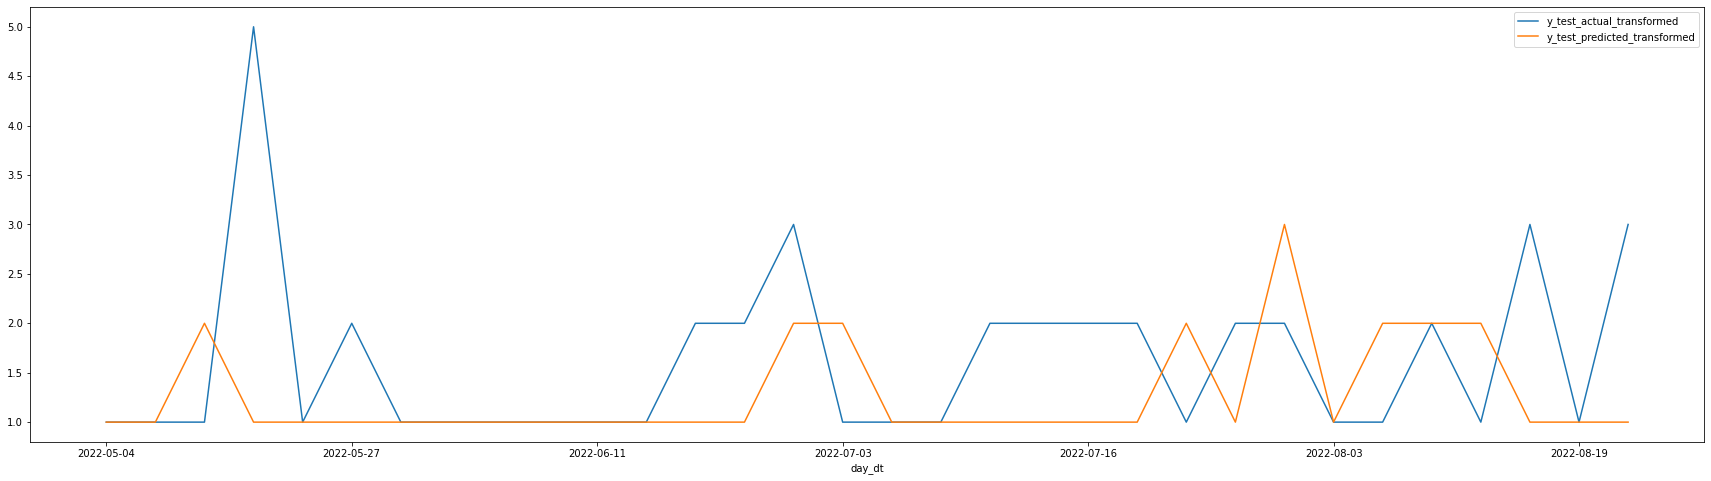

In [146]:
df_test_actual_vs_predicted[(df_test_actual_vs_predicted.store_id == 326) & (df_test_actual_vs_predicted.csc.isin([461103]))][['y_test_actual_transformed','y_test_predicted_transformed']].plot(figsize=(30,8))

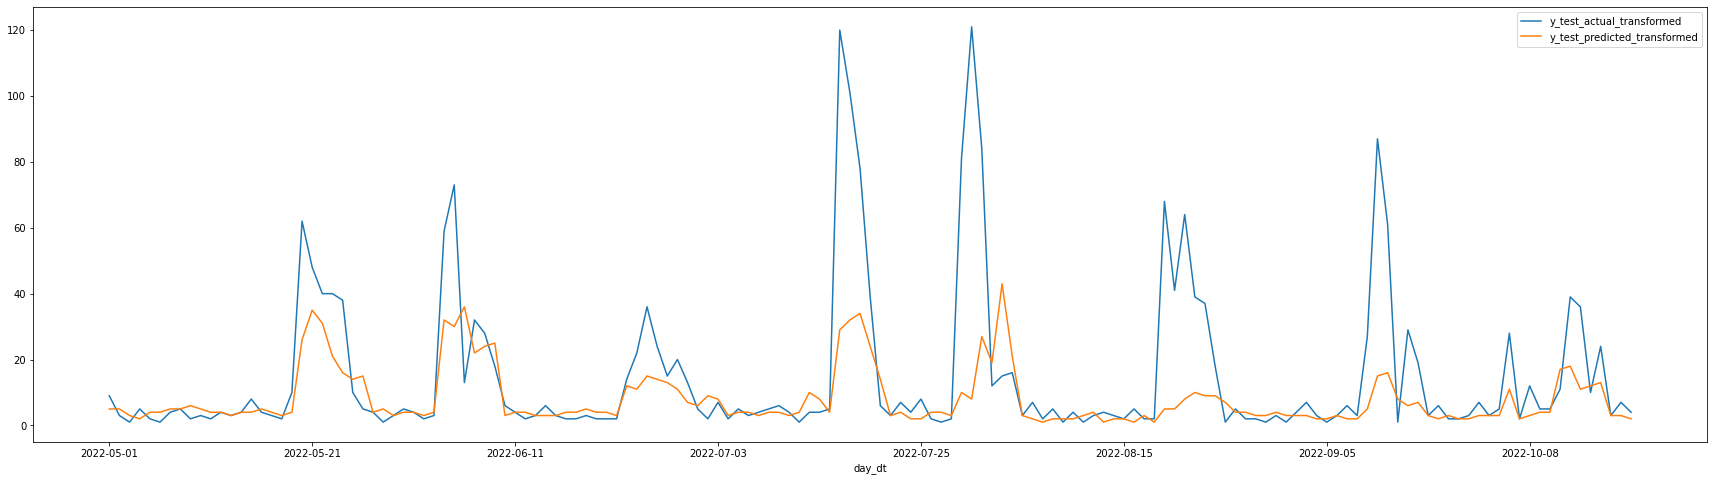

In [147]:
df_test_actual_vs_predicted[(df_test_actual_vs_predicted.store_id == 619) & (df_test_actual_vs_predicted.csc.isin([322045]))][['y_test_actual_transformed','y_test_predicted_transformed']].plot(figsize=(30,8))

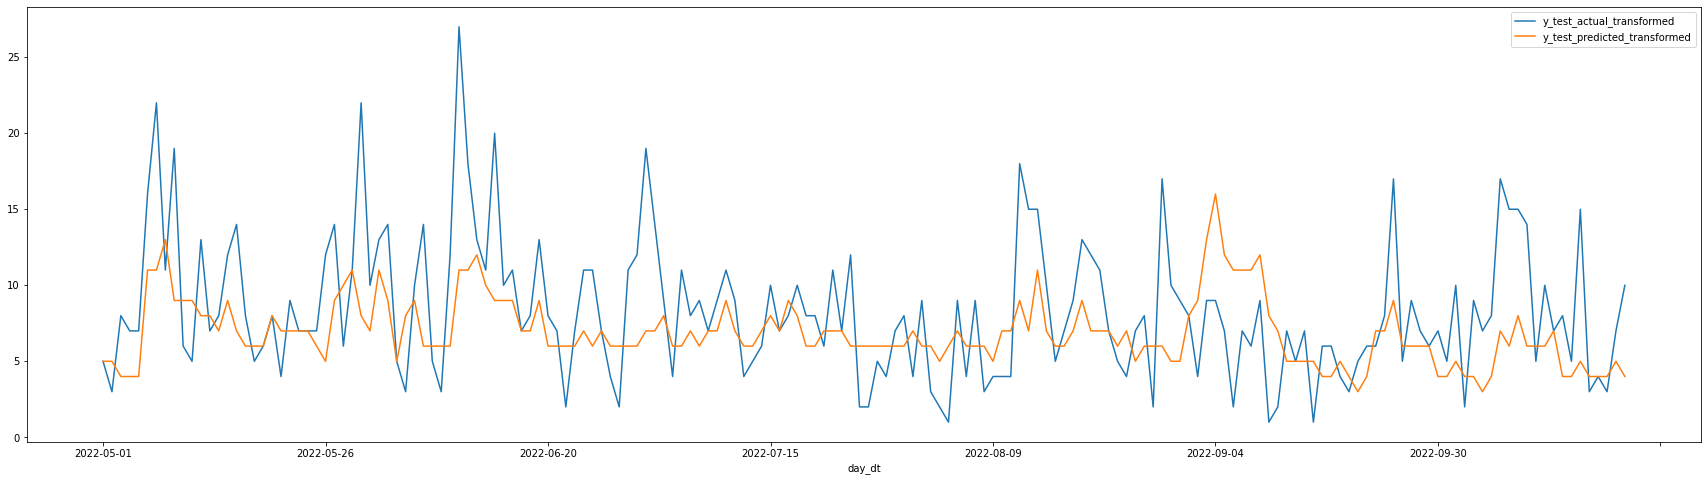

In [148]:
df_test_actual_vs_predicted[(df_test_actual_vs_predicted.store_id == 619) & (df_test_actual_vs_predicted.csc.isin([322087]))][['y_test_actual_transformed','y_test_predicted_transformed']].plot(figsize=(30,8))

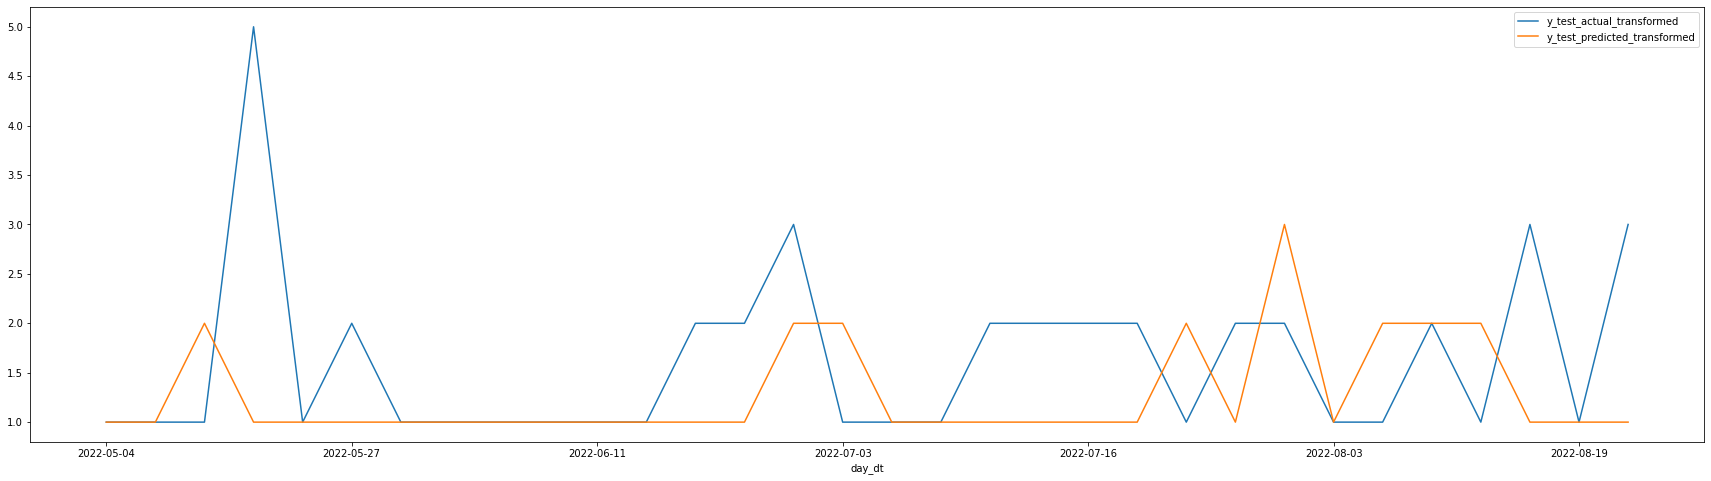

In [149]:
df_test_actual_vs_predicted[(df_test_actual_vs_predicted.store_id == 326) & (df_test_actual_vs_predicted.csc == 461103)][['y_test_actual_transformed','y_test_predicted_transformed']].plot(figsize=(30,8))

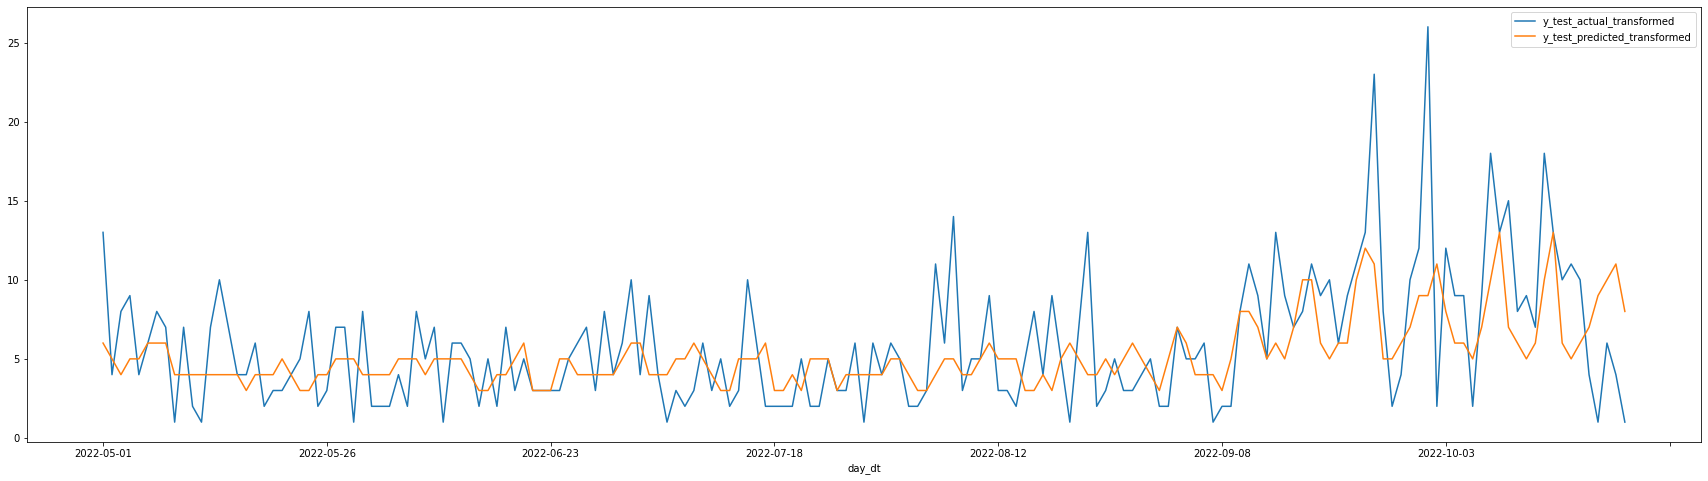

In [150]:
df_test_actual_vs_predicted[(df_test_actual_vs_predicted.store_id == 619) & (df_test_actual_vs_predicted.csc == 146385)][['y_test_actual_transformed','y_test_predicted_transformed']].plot(figsize=(30,8))

In [151]:
df_txn[(df_txn.store_id == 619) & (df_txn.consumer_selling_cd == 146385) & (df_txn.txn_dte == '2022-05-01')].iloc[0]

txn_dte                     2022-05-01
consumer_selling_cd             146385
smic_group_cd                       25
store_id                           619
reg_unit_prc                      2.29
promo_unit_prc                     NaN
total_gross_amt                  29.77
total_item_qty                      13
total_mkdn_qty                       3
total_mkdn_amt                   -0.09
total_net_amt                    29.68
total_mkdn_wod_alloc_amt           0.0
total_mkdn_pod_alloc_amt           0.0
eff_price                         2.29
promo_depth                        1.0
Name: 34201, dtype: object

In [152]:
orig_df_weather_txn_combined.loc[['2022-05-01']].iloc[0]

zip5                             02747
high_temperature_amt              61.2
low_temperature_amt               34.7
avg_temperature_amt              47.95
historic_tmin                    33.98
historic_tmax                    64.04
historic_tavg                    50.36
holiday_ind                          0
store_id                           619
consumer_selling_cd             146385
smic_group_cd                       25
reg_unit_prc                      2.29
promo_unit_prc                     NaN
total_gross_amt                  29.77
total_item_qty                      13
total_mkdn_qty                       3
total_mkdn_amt                   -0.09
total_net_amt                    29.68
total_mkdn_wod_alloc_amt           0.0
total_mkdn_pod_alloc_amt           0.0
eff_price                         2.29
promo_depth                        1.0
log_total_item_qty          2.63905733
log_avg_temperature_amt     3.89079937
log_historic_tavg           3.93885966
log_historic_tmin        

In [153]:
df_test[(df_test.store_id == 619) & (df_test.consumer_selling_cd == 146385)]

zip5  store_id  consumer_selling_cd  promo_depth  \
day_dt                                                          
2022-05-01  02747       619               146385   1.00000000   
2022-05-02  02747       619               146385   1.00000000   
2022-05-03  02747       619               146385   1.00000000   
2022-05-04  02747       619               146385   1.00000000   
2022-05-05  02747       619               146385   1.00000000   
...           ...       ...                  ...          ...   
2022-10-20  02747       619               146385   0.65502183   
2022-10-21  02747       619               146385   0.65502183   
2022-10-22  02747       619               146385   0.65502183   
2022-10-23  02747       619               146385   0.65502183   
2022-10-24  02747       619               146385   0.65502183   

            log_avg_temperature_amt  log_historic_tavg  log_historic_tmin  \
day_dt                                                                      
2022-05-01               3.89079937         3.93885966         3.55477647   
2022-05-02               3.92986292         3.92118094         3.66202200   
2022-05-03               3.92098275         3.95966966         3.86995023   
2022-05-04               3.96745771         3.98675935         3.89222838   
2022-05-05               4.05958057         4.04515432         3.91042172   
...                             ...                ...                ...   
2022-10-20               3.90096206         3.88115134         3.44041809   
2022-10-21               4.02445843         3.93534883         3.64805746   
2022-10-22               4.01548171         3.93885966         3.60983625   
2022-10-23               3.93963817         4.01638302         3.81990772   
2022-10-24               4.10841182         4.08227198         4.00003388   

            log_historic_tmax  log_eff_price  log_total_item_qty  dayofweek  \
day_dt                                                                        
2022-05-01         4.17500247     1.19088756          2.63905733          6   
2022-05-02         4.00660565     1.19088756          1.60943791          0   
2022-05-03         4.06078778     1.19088756          2.19722458          1   
2022-05-04         4.09434456     1.19088756          2.30258509          2   
2022-05-05         4.23410650     1.19088756          1.60943791          3   
...                       ...            ...                 ...        ...   
2022-10-20         4.06388535     0.91629073          1.60943791          3   
2022-10-21         4.17500247     0.91629073          0.69314718          4   
2022-10-22         4.21833054     0.91629073          1.94591015          5   
2022-10-23         4.15261347     0.91629073          1.60943791          6   
2022-10-24         4.15261347     0.91629073          0.69314718          0   

            quarter  month  year  dayofyear  dayofmonth  weekofyear  
day_dt                                                               
2022-05-01        2      5  2022        121           1          17  
2022-05-02        2      5  2022        122           2          18  
2022-05-03        2      5  2022        123           3          18  
2022-05-04        2      5  2022        124           4          18  
2022-05-05        2      5  2022        125           5          18  
...             ...    ...   ...        ...         ...         ...  
2022-10-20        4     10  2022        293          20          42  
2022-10-21        4     10  2022        294          21          42  
2022-10-22        4     10  2022        295          22          42  
2022-10-23        4     10  2022        296          23          42  
2022-10-24        4     10  2022        297          24          43  

[171 rows x 17 columns]

# ***Aggregate Forecast to Week Level***

In [157]:
df_fcst_actual_week = pd.merge(df_test_actual_vs_predicted.reset_index(), df_day_week, how = 'inner', left_on = 'day_dt', right_on = 'date_val')

In [158]:
df_fcst_actual_week.columns

Index(['day_dt', 'y_test_actual', 'y_test_predicted', 'store_id', 'csc',
       'y_test_actual_transformed', 'y_test_predicted_transformed', 'wmape',
       'date_val', 'year', 'week_start_date', 'week_end_date', 'week_nbr'],
      dtype='object')

In [159]:
df_fcst_actual_week.iloc[0]

day_dt                          2022-05-01
y_test_actual                   2.63905733
y_test_predicted                1.91630721
store_id                               619
csc                                 146385
y_test_actual_transformed             13.0
y_test_predicted_transformed           6.0
wmape                                  NaN
date_val                        2022-05-01
year                                  2022
week_start_date                 2022-05-01
week_end_date                   2022-05-07
week_nbr                                19
Name: 0, dtype: object

In [160]:
df_fcst_actual_week_refined = df_fcst_actual_week[['store_id', 'csc', 'day_dt', 'y_test_actual_transformed', 'y_test_predicted_transformed', 'week_start_date', 'week_end_date']]

In [161]:
df_fcst_actual_week_refined.iloc[0]

store_id                               619
csc                                 146385
day_dt                          2022-05-01
y_test_actual_transformed             13.0
y_test_predicted_transformed           6.0
week_start_date                 2022-05-01
week_end_date                   2022-05-07
Name: 0, dtype: object

In [163]:
df_test_act_vs_pred_wkly = df_fcst_actual_week_refined.groupby(['store_id', 'csc', 'week_start_date', 'week_end_date']).agg({'y_test_actual_transformed' : np.sum, 'y_test_predicted_transformed' : np.sum}).reset_index()

In [164]:
df_test_act_vs_pred_wkly

store_id     csc week_start_date week_end_date  \
0         326  146399      2022-05-01    2022-05-07   
1         326  146399      2022-05-08    2022-05-14   
2         326  146399      2022-05-15    2022-05-21   
3         326  146399      2022-05-22    2022-05-28   
4         326  146399      2022-05-29    2022-06-04   
..        ...     ...             ...           ...   
985       619  460913      2022-09-25    2022-10-01   
986       619  460913      2022-10-02    2022-10-08   
987       619  460913      2022-10-09    2022-10-15   
988       619  460913      2022-10-16    2022-10-22   
989       619  460913      2022-10-23    2022-10-29   

     y_test_actual_transformed  y_test_predicted_transformed  
0                          4.0                           6.0  
1                          5.0                           8.0  
2                          5.0                           6.0  
3                          3.0                           4.0  
4                          6.0                           3.0  
..                         ...                           ...  
985                       15.0                          25.0  
986                       23.0                          26.0  
987                       25.0                          31.0  
988                       38.0                          27.0  
989                        5.0                           5.0  

[990 rows x 6 columns]

In [171]:
df_kpi_wkly = df_test_act_vs_pred_wkly[['store_id', 'csc']].drop_duplicates()
wkly_wmape_list = df_test_act_vs_pred_wkly.groupby(['store_id','csc']).apply(lambda x: weighted_mape(x['y_test_actual_transformed'], x['y_test_predicted_transformed']))

wkly_wmape_list = np.asarray(wkly_wmape_list)
wkly_wmape_list = [e.numpy() for e in wkly_wmape_list]
wkly_wmape_list

df_kpi_wkly['wmape_wkly'] = wkly_wmape_list
df_kpi_wkly['accuracy_wkly'] = 100 - df_kpi_wkly['wmape_wkly']
df_kpi_wkly.sort_values(by=['accuracy_wkly'], ascending = False, inplace = True)
df_kpi_wkly

store_id     csc   wmape_wkly  accuracy_wkly
47        326  146629  19.55719557    80.44280443
366       326  460651  21.05263158    78.94736842
548       619  146408  21.97614991    78.02385009
471       619  146385  22.18905473    77.81094527
808       619  322082  22.26890756    77.73109244
162       326  322060  22.50000000    77.50000000
626       619  146675  23.96021700    76.03978300
240       326  322325  24.80000000    75.20000000
340       326  410691  24.93827160    75.06172840
834       619  322087  25.06963788    74.93036212
433       326  466564  26.51515152    73.48484848
522       619  146399  26.75343456    73.24656544
266       326  322389  28.00000000    72.00000000
678       619  146835  28.17869416    71.82130584
600       619  146629  29.93130520    70.06869480
25        326  146408  30.35714286    69.64285714
292       326  322390  30.88235294    69.11764706
94        326  146835  31.03448276    68.96551724
111       326  147065  31.31868132    68.68131868
392       326  460913  32.32323232    67.67676768
457       326  778229  32.50000000    67.50000000
417       326  461103  32.69230769    67.30769231
188       326  322082  32.79569892    67.20430108
782       619  322060  34.02889246    65.97110754
938       619  413364  34.41860465    65.58139535
652       619  146761  34.72222222    65.27777778
314       326  322455  34.90566038    65.09433962
0         326  146399  35.15625000    64.84375000
73        326  146761  35.45454545    64.54545455
964       619  460913  36.30136986    63.69863014
886       619  322557  36.68234288    63.31765712
860       619  322554  39.01060071    60.98939929
497       619  146393  39.65053763    60.34946237
136       326  322059  40.72164948    59.27835052
574       619  146453  42.95302013    57.04697987
214       326  322087  43.89438944    56.10561056
730       619  322058  47.86585366    52.13414634
704       619  322045  49.71677560    50.28322440
756       619  322059  53.59408034    46.40591966
912       619  322625  63.16831683    36.83168317

In [178]:
df_wkly = pd.merge(df_test_act_vs_pred_wkly, df_wkly_weather_stats, how = 'inner', on = ['week_start_date', 'week_end_date'])
df_wkly = pd.merge(df_wkly, df_upc[['consumer_selling_cd', 'item_dsc', 'smic_group_cd', 'smic_group_dsc', 'smic_category_cd', 'smic_category_dsc']], how = 'inner', left_on = 'csc', right_on = 'consumer_selling_cd')
df_wkly.drop(columns = ['consumer_selling_cd'], inplace = True)
df_wkly.iloc[0]

store_id                                                 326
csc                                                   146399
week_start_date                                   2022-05-01
week_end_date                                     2022-05-07
y_test_actual_transformed                                4.0
y_test_predicted_transformed                             6.0
wkly_avg_high_temperature_amt                    59.65714286
wkly_avg_low_temperature_amt                     40.82142857
wkly_avg_temperature_amt                         50.23928571
item_dsc                         S SEL BROTH CHICKEN ASEPTIC
smic_group_cd                                             25
smic_group_dsc                                         SOUPS
smic_category_cd                                          15
smic_category_dsc                              BOUILON BROTH
Name: 0, dtype: object

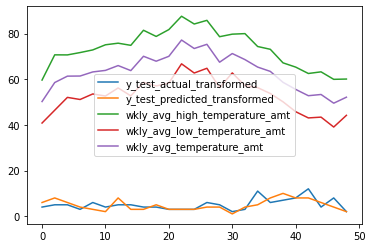

In [179]:
df_wkly[(df_wkly.store_id == 326) & (df_wkly.csc == 146399)][['y_test_actual_transformed', 'y_test_predicted_transformed', 'wkly_avg_high_temperature_amt', 'wkly_avg_low_temperature_amt', 'wkly_avg_temperature_amt']].plot()

# ***End of my experimentation***